In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
df = pd.read_csv('./complete_trips_data_2023.csv')
df.drop('Unnamed: 0', inplace=True, axis = 1)
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df.drop('date', inplace=True, axis=1)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305701 entries, 0 to 1305700
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             1305701 non-null  object        
 1   rideable_type       1305701 non-null  object        
 2   started_at          1305701 non-null  datetime64[ns]
 3   ended_at            1305701 non-null  datetime64[ns]
 4   start_station_name  1305701 non-null  object        
 5   start_station_id    1305701 non-null  object        
 6   end_station_name    1305701 non-null  object        
 7   end_station_id      1305701 non-null  object        
 8   start_lat           1305701 non-null  float64       
 9   start_lng           1305701 non-null  float64       
 10  end_lat             1305701 non-null  float64       
 11  end_lng             1305701 non-null  float64       
 12  member_casual       1305701 non-null  object        
 13  season      

### Adding a duration in minutes column and reindexing columns

In [4]:
df['duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [5]:
df = df.reindex(columns=['ride_id', 'rideable_type', 'started_at', 'ended_at', 'duration_minutes',  'trip_distance', 'start_station_id', 'start_station_name', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'season', 'AvgTemp', 'member_casual' ])

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,duration_minutes,trip_distance,start_station_id,start_station_name,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,season,AvgTemp,member_casual
0,0093AA5E7E3E0158,docked_bike,2023-04-13 13:49:59,2023-04-13 13:55:04,5.083333,0.324752,A32011,Innovation Lab - 125 Western Ave at Batten Way,Soldiers Field Park - 111 Western Ave,A32006,42.363713,-71.124598,42.364263,-71.118276,spring,68.5,member
1,BFA8B88E063688F4,docked_bike,2023-04-25 09:44:38,2023-04-25 09:51:28,6.833333,0.716256,M32045,Museum of Science,One Broadway / Kendall Sq at Main St / 3rd St,M32003,42.367690,-71.071163,42.362242,-71.083111,spring,51.5,member
2,A9C51FA200C31A81,docked_bike,2023-04-24 18:39:31,2023-04-24 18:58:05,18.566667,2.627298,D32001,New Balance - 20 Guest St,HMS/HSPH - Avenue Louis Pasteur at Longwood Ave,B32003,42.357329,-71.146735,42.337417,-71.102861,spring,51.5,casual
3,0C1D451797FF0871,docked_bike,2023-04-04 19:25:31,2023-04-04 19:32:14,6.716667,0.859087,M32045,Museum of Science,Gore Street at Lambert Street,M32081,42.367690,-71.071163,42.373080,-71.086342,spring,48.5,member
4,DDDCD0A2D2EE7A37,docked_bike,2023-04-11 08:36:14,2023-04-11 08:52:39,16.416667,1.607524,M32045,Museum of Science,Columbus Ave at W. Canton St,C32077,42.367690,-71.071163,42.344742,-71.076482,spring,61.5,member


# **Categorical Analysis**

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_938/2231089708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=each, data=df, palette='viridis')


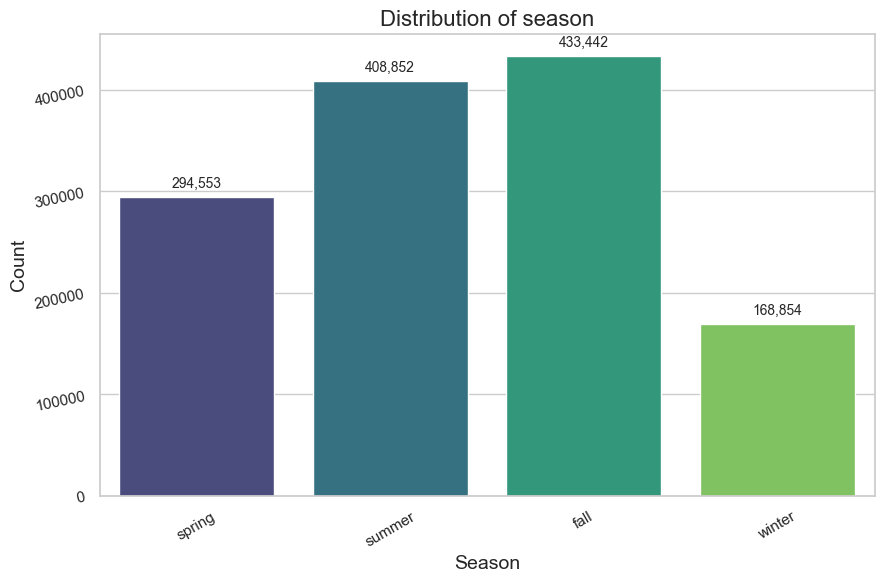

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_938/2231089708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=each, data=df, palette='viridis')


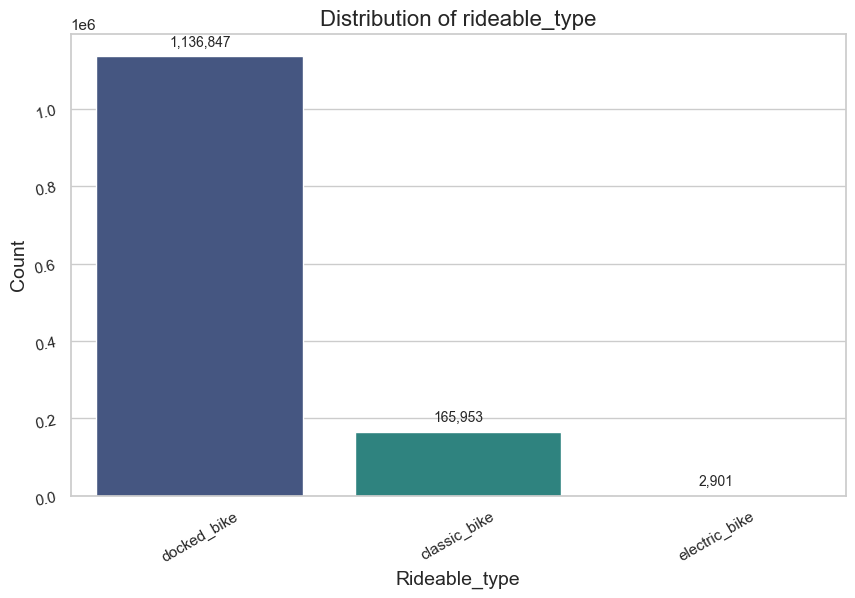

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_938/2231089708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=each, data=df, palette='viridis')


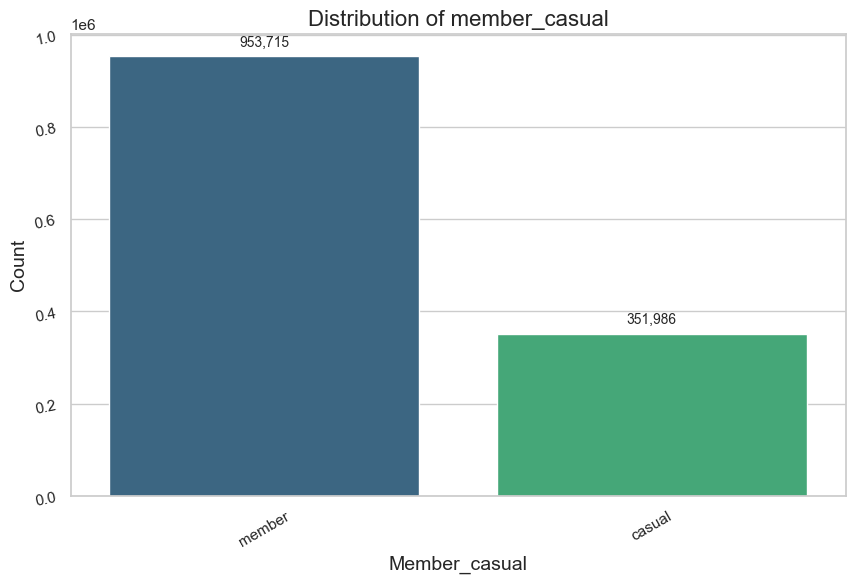

In [7]:
sns.set(style='whitegrid')

categorical = ['season', 'rideable_type', 'member_casual']

for each in categorical:
    plt.figure(figsize=(10,6))
    ax = sns.countplot(x=each, data=df, palette='viridis')    
    plt.title(f'Distribution of {each}', fontsize=16)
    plt.xlabel(each.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    ax.tick_params(axis='x', rotation=30)
    ax.tick_params(axis='y', rotation=12)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}',  # Format the count as a comma-separated number
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points',
                    fontsize=10)
    
    
    
    plt.show()


### **It is evident that most of the rides happen in Summer and Fall, and the riders are members who use Docked bikes as their main bike type.** 

# **Temporal Analysis**

In [8]:
df['start_hour'] = df['started_at'].dt.hour
df['end_hour'] = df['started_at'].dt.hour
df['start_day'] = df['started_at'].dt.dayofweek # Monday=0, Sunday=6
df['start_month'] = df['started_at'].dt.month

### Hourly Usage on Different Days of The Week

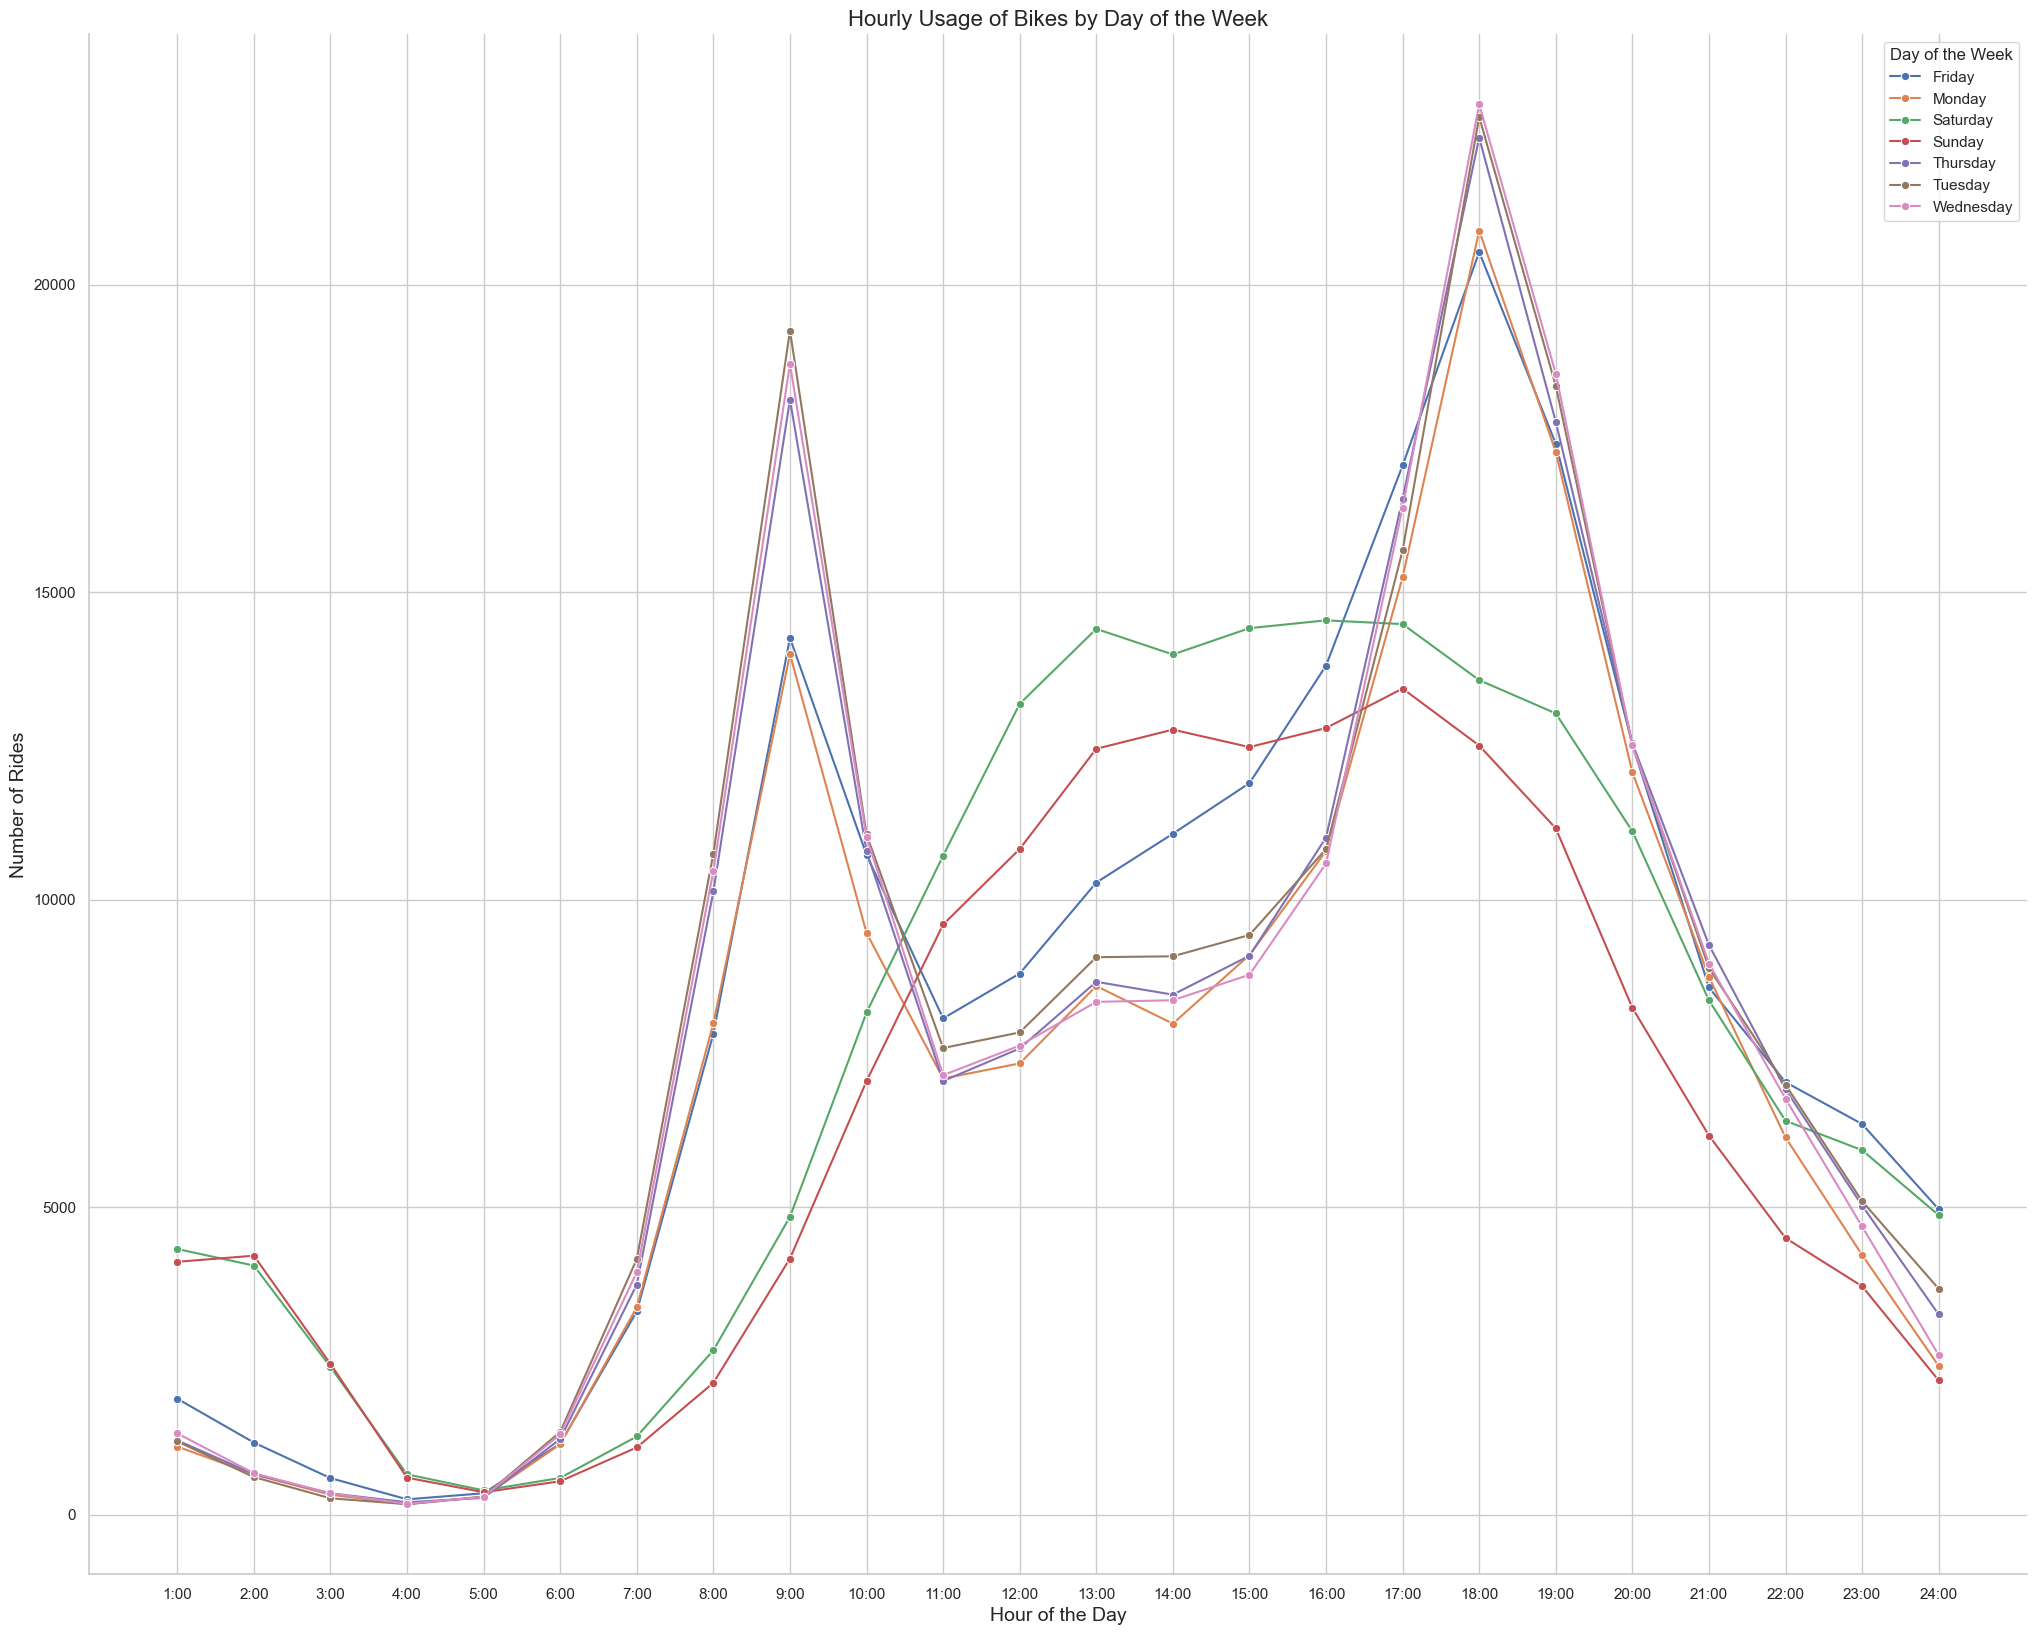

In [9]:
# Convert 'started_at' to day of the week
df['start_day_of_week'] = df['started_at'].dt.day_name()

# Aggregate data
hourly_weekday_counts = df.groupby(['start_hour', 'start_day_of_week'])['ride_id'].count().reset_index(name='count')

# Plot
plt.figure(figsize=(25,20))
sns.lineplot(data=hourly_weekday_counts, x='start_hour', y='count', hue='start_day_of_week', marker='o')
plt.title('Hourly Usage of Bikes by Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(range(0, 24), labels=[f"{i}:00" for i in range(1, 25)])
plt.legend(title='Day of the Week')
sns.despine()
plt.grid(True)
plt.show()


### - It appears that there are distinct peaks in bike usage during the daytime hours across all days of the week, with the 2 highest peaks generally occurring in the morning at 9:00AM and early evening, around 18:00 (6 PM). 
### - There's a noticeable pattern of increased usage on weekdays during typical commuting hours (morning and late afternoon), **which may suggest a significant use of bikes for work commutes.** 
### - **On weekends**, the distribution is more spread out throughout the day with a later peak, which could **indicate more recreational or non-commuting use**. 
### - Additionally, the lowest usage appears to occur in the very early hours of the morning across all days, which is expected as this would be outside of typical commuting or recreational activity hours.

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_938/2843061141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('start_day').size().index, y=df.groupby('start_day').size().values, palette='muted')


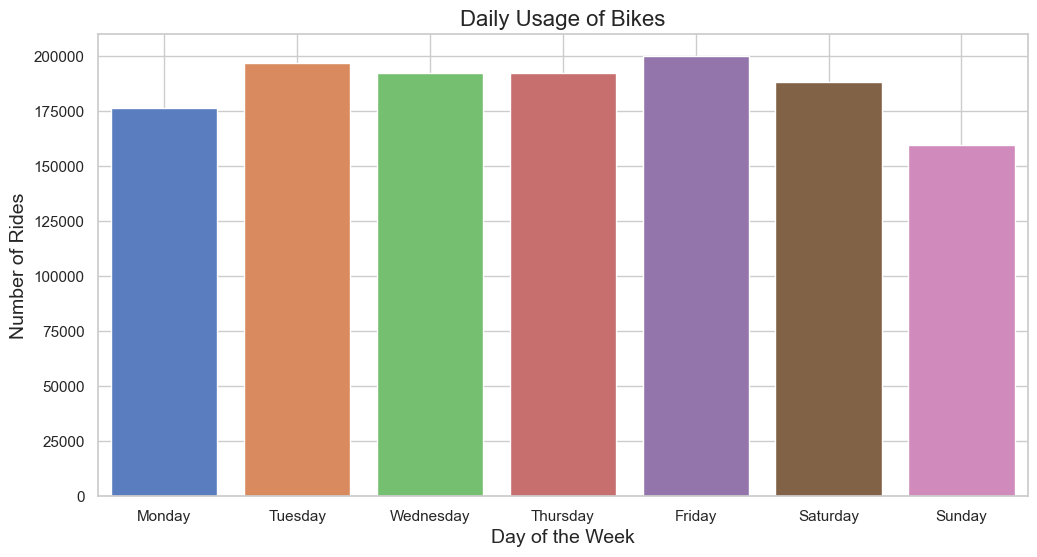

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df.groupby('start_day').size().index, y=df.groupby('start_day').size().values, palette='muted')
plt.title('Daily Usage of Bikes', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(ticks=range(0, 7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)

plt.show()


### It can be seen that the distribution of the number of bike rides over the week is not much varied. It decreases over the weekend as expected. What's surprising is the number of bike rides on `Monday`, these rides should be closely matching the number of rides on the other days of the week (except the weekend) but they are less approxiamtely 20,000 less. 

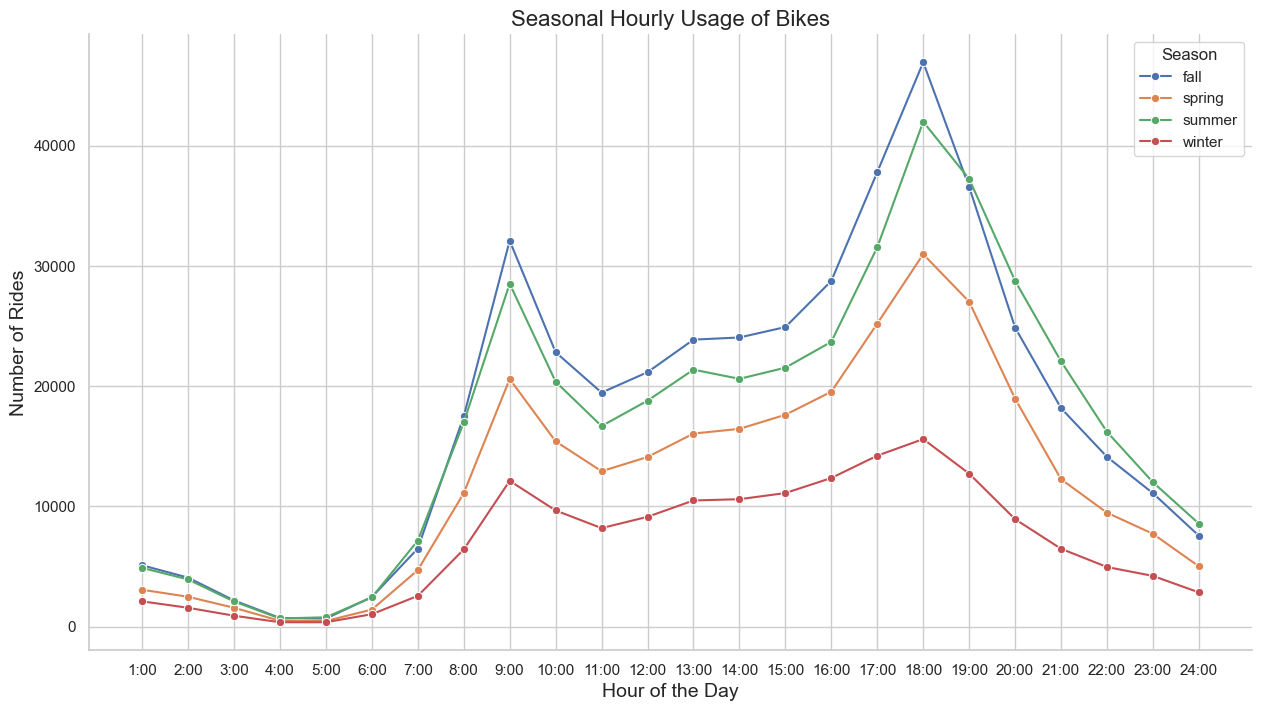

In [11]:
# Aggregate data by hour and season
seasonal_hourly_counts = df.groupby(['start_hour', 'season'])['ride_id'].count().reset_index(name='count')

# Plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=seasonal_hourly_counts, x='start_hour', y='count', hue='season', marker='o')
plt.title('Seasonal Hourly Usage of Bikes', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(range(0, 24), labels=[f"{i}:00" for i in range(1, 25)])
plt.legend(title='Season')
sns.despine()
plt.grid(True)
plt.show()


### This plot confirms that indeed the most busy time's of the year are summer and fall

### **Most Taken Routes**

In [12]:
top_routes = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')

In [13]:
top_100_routes = top_routes.sort_values('count', ascending=False).head(100)
top_100_routes

,start_station_name,end_station_name,count
19068,Central Square at Mass Ave / Essex St,MIT Pacific St at Purrington St,1483
49479,MIT at Mass Ave / Amherst St,MIT Vassar St,1439
49353,MIT at Mass Ave / Amherst St,Central Square at Mass Ave / Essex St,1398
38373,Harvard Square at Mass Ave/ Dunster,Harvard University Radcliffe Quadrangle at She...,1389
49305,MIT at Mass Ave / Amherst St,Beacon St at Massachusetts Ave,1378
...,...,...,...
77458,Washington St at Lenox St,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,481
12897,Brigham Circle - Francis St at Huntington Ave,Forsyth St at Huntington Ave,479
58850,Park Dr at Buswell St,Commonwealth Ave at Agganis Way,471
24054,Commonwealth Ave at Agganis Way,Park Dr at Buswell St,471


In [14]:
import folium
import branca.colormap as cm

# Initializing a map centered around Boston
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=13)

# Generating a color palette
color_palette = cm.linear.YlGnBu_09.scale(0, top_100_routes['count'].max())
top_100_routes['color'] = top_100_routes['count'].apply(color_palette)

# Adding lines to the map for the top 100 routes with labels and tooltips
for idx, row in top_100_routes.iterrows():
    start_station = df[df['start_station_name'] == row['start_station_name']].iloc[0]
    end_station = df[df['end_station_name'] == row['end_station_name']].iloc[0]
    start_coords = [start_station['start_lat'], start_station['start_lng']]
    end_coords = [end_station['end_lat'], end_station['end_lng']]
    
    # Tooltip and popup
    tooltip = f"Route from {start_station['start_station_name']} to {end_station['end_station_name']}"
    popup = folium.Popup(f"{row['count']} rides", parse_html=True)

    # Drawing the lines with colors based on count
    folium.PolyLine(
        locations=[start_coords, end_coords],
        color=row['color'],
        weight=2.5,
        opacity=0.8,
        tooltip=tooltip,
        popup=popup
    ).add_to(boston_map)

# Adding the color legend
color_palette.caption = 'Number of Rides'
boston_map.add_child(color_palette)

# Saving to an HTML file -- Please open this in a browser for an interactive map, you can hover over the routes for info on their respective stations
boston_map.save('top_100_bike_routes_enhanced.html')


In [15]:
from folium.plugins import HeatMap

# Create a map centered around Boston
map_boston = folium.Map(location=[42.3601, -71.0589], zoom_start=13)

# Heatmap for start stations
start_coords = df[['start_lat', 'start_lng']].dropna()
HeatMap(data=start_coords, radius=15).add_to(map_boston)

# Heatmap for end stations
end_coords = df[['end_lat', 'end_lng']].dropna()
HeatMap(data=end_coords, radius=15).add_to(map_boston)

# Display the map
map_boston.save('boston_bike_stations_heatmap.html')


In [16]:
len(df['start_station_id'].unique()) 

491

In [17]:
len(df['end_station_id'].unique())

491

In [18]:
# Extracting unique start stations
start_stations = df[['start_station_id', 'start_station_name', 'start_lat', 'start_lng']].drop_duplicates()

# Renaming columns for uniformity
start_stations.columns = ['station_id', 'station_name', 'lat', 'lng']

# Extracting unique end stations
end_stations = df[['end_station_id', 'end_station_name', 'end_lat', 'end_lng']].drop_duplicates()

# Renaming columns for uniformity
end_stations.columns = ['station_id', 'station_name', 'lat', 'lng']

# Combining and removing any duplicates
stations_df = pd.concat([start_stations, end_stations]).drop_duplicates(subset=['station_id'])



In [19]:
stations_df

,station_id,station_name,lat,lng
0,A32011,Innovation Lab - 125 Western Ave at Batten Way,42.363713,-71.124598
1,M32045,Museum of Science,42.367690,-71.071163
2,D32001,New Balance - 20 Guest St,42.357329,-71.146735
5,S32047,Foley St at Grand Union Blvd,42.393018,-71.080717
6,E32008,Centre St at Seaverns Ave,42.312120,-71.114298
...,...,...,...,...
1142552,S32051,Foss Park 2 (temp for winter),42.390509,-71.089455
1143828,F32008,Logan Park,42.418007,-71.096572
1147449,E32015,Lincoln St at Empire St,42.357651,-71.128513
1148096,S32053,Chestnut St at Poplar St,42.377636,-71.085954


In [20]:
df.head()

,ride_id,rideable_type,started_at,ended_at,duration_minutes,trip_distance,start_station_id,start_station_name,end_station_name,end_station_id,...,end_lat,end_lng,season,AvgTemp,member_casual,start_hour,end_hour,start_day,start_month,start_day_of_week
0,0093AA5E7E3E0158,docked_bike,2023-04-13 13:49:59,2023-04-13 13:55:04,5.083333,0.324752,A32011,Innovation Lab - 125 Western Ave at Batten Way,Soldiers Field Park - 111 Western Ave,A32006,...,42.364263,-71.118276,spring,68.5,member,13,13,3,4,Thursday
1,BFA8B88E063688F4,docked_bike,2023-04-25 09:44:38,2023-04-25 09:51:28,6.833333,0.716256,M32045,Museum of Science,One Broadway / Kendall Sq at Main St / 3rd St,M32003,...,42.362242,-71.083111,spring,51.5,member,9,9,1,4,Tuesday
2,A9C51FA200C31A81,docked_bike,2023-04-24 18:39:31,2023-04-24 18:58:05,18.566667,2.627298,D32001,New Balance - 20 Guest St,HMS/HSPH - Avenue Louis Pasteur at Longwood Ave,B32003,...,42.337417,-71.102861,spring,51.5,casual,18,18,0,4,Monday
3,0C1D451797FF0871,docked_bike,2023-04-04 19:25:31,2023-04-04 19:32:14,6.716667,0.859087,M32045,Museum of Science,Gore Street at Lambert Street,M32081,...,42.373080,-71.086342,spring,48.5,member,19,19,1,4,Tuesday
4,DDDCD0A2D2EE7A37,docked_bike,2023-04-11 08:36:14,2023-04-11 08:52:39,16.416667,1.607524,M32045,Museum of Science,Columbus Ave at W. Canton St,C32077,...,42.344742,-71.076482,spring,61.5,member,8,8,1,4,Tuesday


In [21]:
average_dist = df['trip_distance'].mean()

print(f'The average trip distance is {average_dist.round(2)} miles')


The average trip distance is 1.24 miles


In [22]:
from scipy.spatial import distance_matrix

coordinates = stations_df[['lat', 'lng']]

# Calculate the distance matrix for all stations
dist_matrix = distance_matrix(coordinates, coordinates)

# Replace 0s with np.nan to ignore self-distances
np.fill_diagonal(dist_matrix, np.nan)

# Finding the minimum distance to the nearest station for each station
min_distances = np.nanmin(dist_matrix, axis=1)

# Calculating the average of these minimum distances
average_min_distance = np.nanmean(min_distances)

print(f"The average distance to the nearest station is {average_min_distance:.2} miles.")


The average distance to the nearest station is 0.0041 miles.


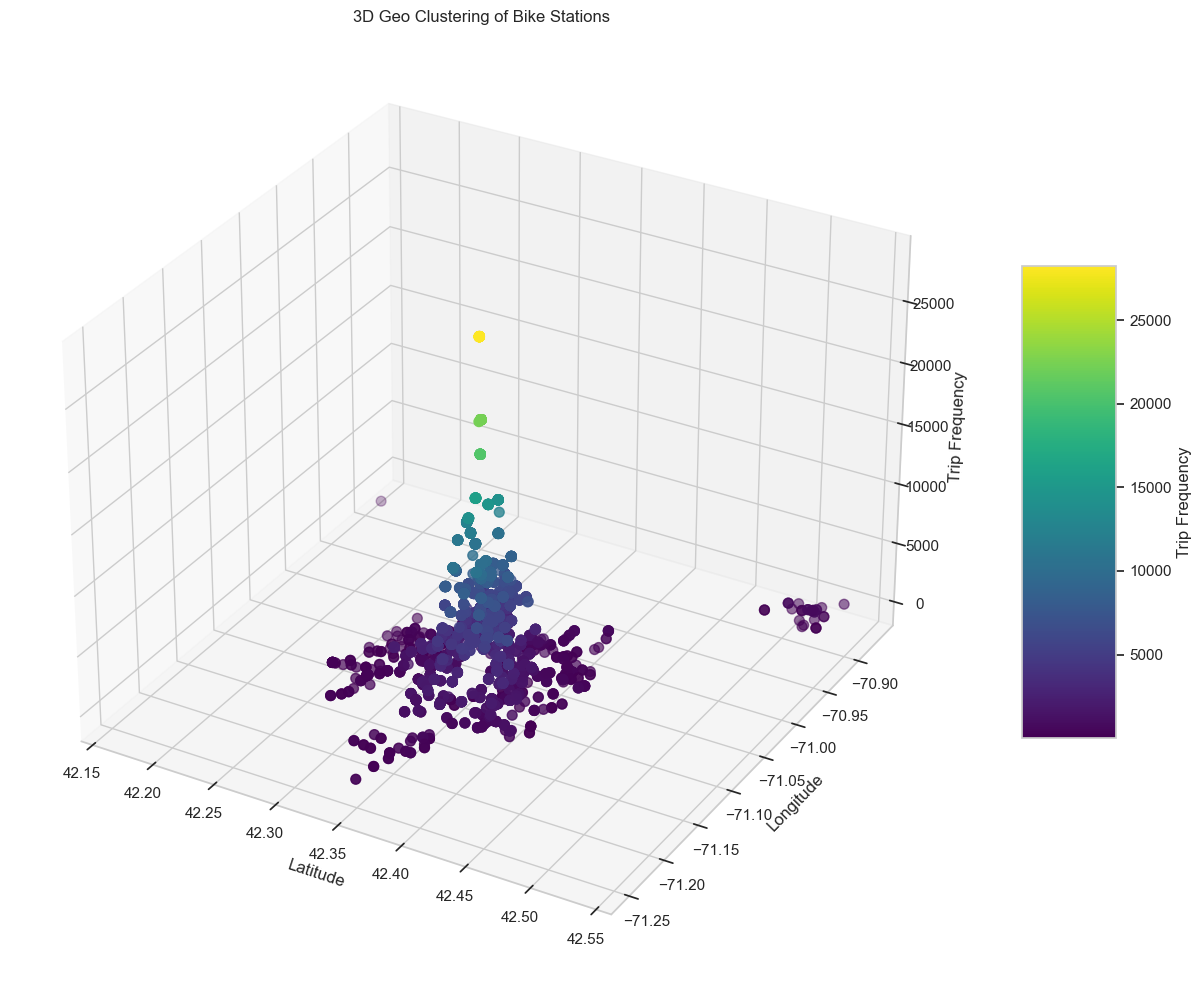

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# Calculating trip frequency for each station
trip_frequency = df.groupby(['start_station_name'])['ride_id'].count().reset_index(name='trip_frequency')

# Merging the trip frequency back onto the main DataFrame to associate with lat/lng
df = df.merge(trip_frequency, on='start_station_name', how='left')

# Now create a DataFrame for stations with latitude, longitude, and trip frequency
# We use .drop_duplicates() because there will be multiple entries for each station
stations_with_frequency = df[['start_station_name', 'start_lat', 'start_lng', 'trip_frequency']].drop_duplicates()

# Increasing the figure size
fig = plt.figure(figsize=(14, 10))  # Width, Height in inches
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for latitude, longitude, and trip frequency with larger point size
# and a color map that reflects the trip frequency
sc = ax.scatter(stations_with_frequency['start_lat'], 
                stations_with_frequency['start_lng'], 
                stations_with_frequency['trip_frequency'],
                c=stations_with_frequency['trip_frequency'],  # Color by trip frequency
                cmap='viridis',  # Color map
                s=50)  # Point size

# Adding a color bar
cbar = plt.colorbar(sc, shrink=0.5, aspect=5)
cbar.set_label('Trip Frequency')

# Labels and titles
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Trip Frequency')
plt.title('3D Geo Clustering of Bike Stations')

# Enhancing the plot aesthetics
ax.grid(True)  
plt.tight_layout()  

# Showing the plot
plt.show()



In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305701 entries, 0 to 1305700
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             1305701 non-null  object        
 1   rideable_type       1305701 non-null  object        
 2   started_at          1305701 non-null  datetime64[ns]
 3   ended_at            1305701 non-null  datetime64[ns]
 4   duration_minutes    1305701 non-null  float64       
 5   trip_distance       1305701 non-null  float64       
 6   start_station_id    1305701 non-null  object        
 7   start_station_name  1305701 non-null  object        
 8   end_station_name    1305701 non-null  object        
 9   end_station_id      1305701 non-null  object        
 10  start_lat           1305701 non-null  float64       
 11  start_lng           1305701 non-null  float64       
 12  end_lat             1305701 non-null  float64       
 13  end_lng     

1. **Axes Information**: The x-axis shows the latitude, the y-axis shows the longitude, and the z-axis represents trip frequency. These dimensions suggest that each point in the plot corresponds to a bike station's geographical location and its usage intensity.

2. **Clustering**: Points are clustered according to geographical proximity, with denser clusters likely indicating areas with higher numbers of bike stations or areas with higher usage.

4. **Spatial Distribution**: There is a noticeable concentration of bike stations within a specific latitude and longitude range, which correspond to the **Backbay, Fenway-Kenmore, Boston's downtown, Somerville and the Cambridge area.**

5. **Outliers**: There are a few bike stations positioned away from the main cluster, which are in the suburbs of Boston such as **Everett, Revere, Malden, Hydepark, and Dorchester.**

6. **Trip Frequency**: Most bike stations have a relatively low to moderate trip frequency, with a few stations showing very high usage. These high-frequency stations are located at strategic points, like major public areas, transit hubs, or commercial centers.

7. **Analysis Focus**: For our project, stations with higher trip frequencies (warmer colors) would be of particular interest, as optimizing their placement could have a more significant impact on overall service efficiency.

### **In terms of your project's next steps, we  want to investigate the characteristics of the high-frequency stations to understand why they are popular and determine if additional stations are needed in those areas. Similarly, examining the low-frequency stations could reveal if they are poorly placed or if there are other factors influencing their low usage.**

 >> ### **Filtering Dataset based on trip frequency , Removing the stations with trip frequency <=5000. i.e. The number of trip's that originate from a start station are less than 5000**

In [27]:
filtered_df = df[df['trip_frequency'] > 5000]

In [28]:
filtered_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'duration_minutes', 'trip_distance', 'start_station_id',
       'start_station_name', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'season', 'AvgTemp', 'member_casual',
       'start_hour', 'end_hour', 'start_day', 'start_month',
       'start_day_of_week', 'trip_frequency'],
      dtype='object')

In [29]:
filtered_df

,ride_id,rideable_type,started_at,ended_at,duration_minutes,trip_distance,start_station_id,start_station_name,end_station_name,end_station_id,...,end_lng,season,AvgTemp,member_casual,start_hour,end_hour,start_day,start_month,start_day_of_week,trip_frequency
16,85A52A54DC77E832,docked_bike,2023-04-13 17:55:22,2023-04-13 18:09:57,14.583333,1.877944,M32055,Harvard St at Greene-Rose Heritage Park,Lesley University,M32039,...,-71.119019,spring,68.5,member,17,17,3,4,Thursday,5760
17,17A0784E0EAE3DE2,docked_bike,2023-04-27 17:26:03,2023-04-27 17:42:33,16.500000,1.329318,M32026,359 Broadway - Broadway at Fayette Street,Lesley University,M32039,...,-71.119019,spring,50.5,member,17,17,3,4,Thursday,5832
22,898C9A7B7C01D1CE,docked_bike,2023-04-13 20:09:14,2023-04-13 20:16:01,6.783333,0.328890,M32055,Harvard St at Greene-Rose Heritage Park,Mass Ave at Albany St,M32061,...,-71.096703,spring,68.5,member,20,20,3,4,Thursday,5760
23,0C3C85353AC1D0A0,docked_bike,2023-04-22 18:43:04,2023-04-22 19:05:06,22.033333,2.772623,M32026,359 Broadway - Broadway at Fayette Street,Lewis Wharf at Atlantic Ave,D32006,...,-71.050877,spring,48.0,member,18,18,5,4,Saturday,5832
24,427BDC3864BACB22,docked_bike,2023-04-29 12:52:25,2023-04-29 12:59:52,7.450000,0.761536,M32026,359 Broadway - Broadway at Fayette Street,Mass Ave at Albany St,M32061,...,-71.096703,spring,50.0,member,12,12,5,4,Saturday,5832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305569,5715442AE6B59F9F,classic_bike,2023-12-08 07:47:37,2023-12-08 07:57:03,9.433333,1.188867,A32025,Nashua Street at Red Auerbach Way,Stuart St at Berkeley St,D32049,...,-71.072421,winter,34.5,member,7,7,4,12,Friday,6372
1305570,A0792D35A364FC36,classic_bike,2023-12-10 21:48:12,2023-12-10 21:54:38,6.433333,0.765234,A32002,Commonwealth Ave at Agganis Way,Park Dr at Buswell St,A32008,...,-71.105301,winter,53.0,member,21,21,6,12,Sunday,10754
1305571,FD56933EA9FEEA63,classic_bike,2023-12-10 11:10:49,2023-12-10 11:20:11,9.366667,0.765234,A32002,Commonwealth Ave at Agganis Way,Park Dr at Buswell St,A32008,...,-71.105301,winter,53.0,member,11,11,6,12,Sunday,10754
1305573,94A5706C077F4347,classic_bike,2023-12-09 18:01:34,2023-12-09 18:21:52,20.300000,1.829355,A32002,Commonwealth Ave at Agganis Way,Inman Square at Springfield St.,M32062,...,-71.100265,winter,42.5,member,18,18,5,12,Saturday,10754


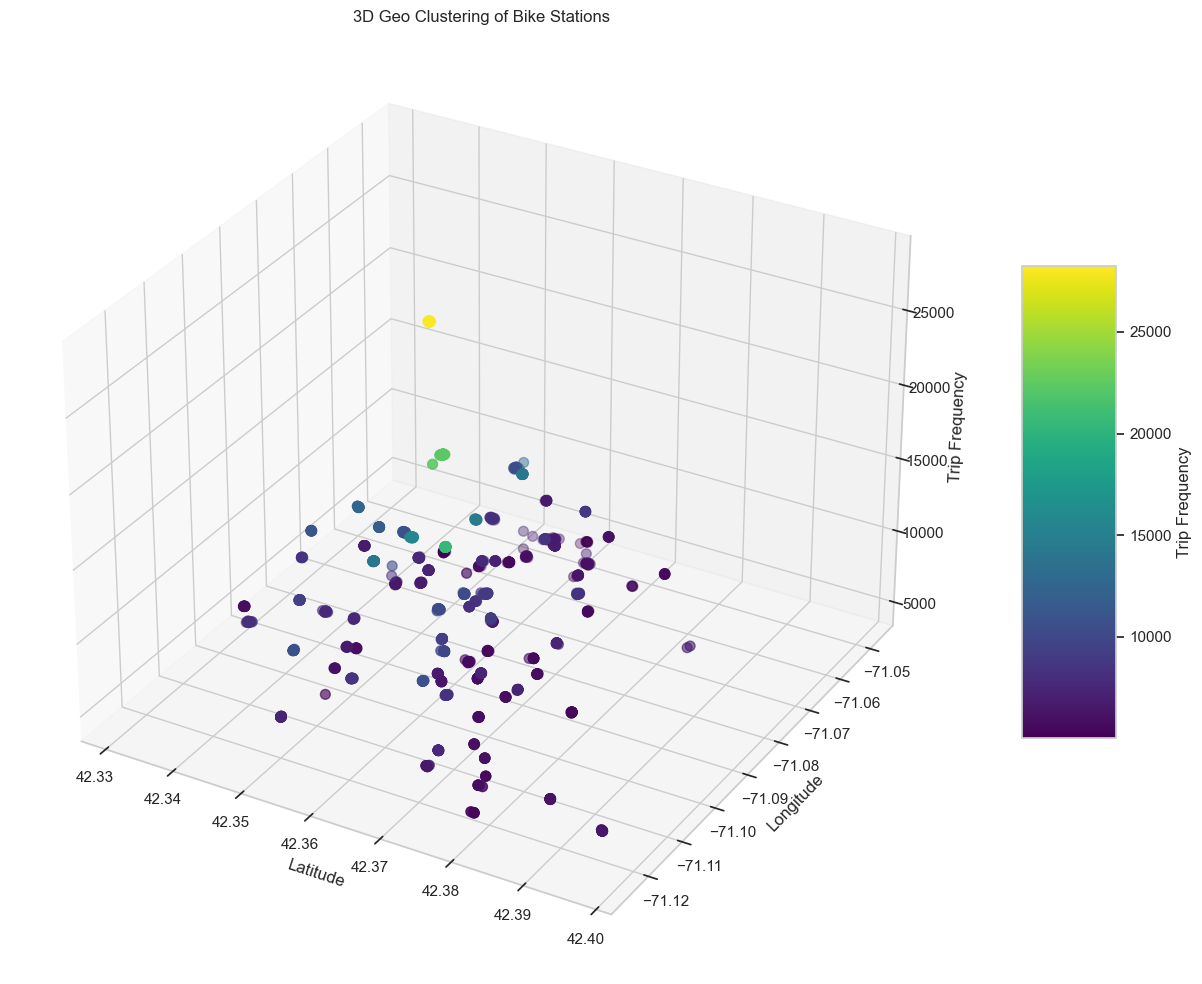

In [30]:
stations_with_frequency_more_than_5000 = filtered_df[['start_station_name', 'start_lat', 'start_lng', 'trip_frequency']].drop_duplicates()

# Increasing the figure size
fig = plt.figure(figsize=(14, 10))  # Width, Height in inches
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for latitude, longitude, and trip frequency with larger point size
# and a color map that reflects the trip frequency
sc = ax.scatter(stations_with_frequency_more_than_5000['start_lat'], 
                stations_with_frequency_more_than_5000['start_lng'], 
                stations_with_frequency_more_than_5000['trip_frequency'],
                c=stations_with_frequency_more_than_5000['trip_frequency'],  # Color by trip frequency
                cmap='viridis',  # Color map
                s=50)  # Point size

# Adding a color bar
cbar = plt.colorbar(sc, shrink=0.5, aspect=5)
cbar.set_label('Trip Frequency')

# Labels and titles
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Trip Frequency')
plt.title('3D Geo Clustering of Bike Stations')

# Enhancing the plot aesthetics
ax.grid(True)  
plt.tight_layout()  

# Showing the plot
plt.show()

### **We can see the data is much better represented now, as the data is spread out and these points can give valuabel information when we apply DBSCAN / HDBSCAN on this data**

**Strategic Placement Considerations: The stations shown in yellow or green, indicating the highest usage, could be critical nodes in the bike-sharing network. These stations might benefit from additional resources, such as more bikes or better infrastructure.**

In [31]:
# Create a map centered around Boston
map_boston = folium.Map(location=[42.3601, -71.0589], zoom_start=13)

# Heatmap for start stations
start_coords = filtered_df[['start_lat', 'start_lng']].dropna()
HeatMap(data=start_coords, radius=15).add_to(map_boston)

# Heatmap for end stations
end_coords = filtered_df[['end_lat', 'end_lng']].dropna()
HeatMap(data=end_coords, radius=15).add_to(map_boston)

# Display the map
map_boston.save('filtered_boston_bike_stations_heatmap.html')

### >> **Filtering for trip frequency being greater than 10,000 to see if we get a better representatiion of our data ?**

In [32]:
filtered_df_10k = df[df['trip_frequency'] > 10000]

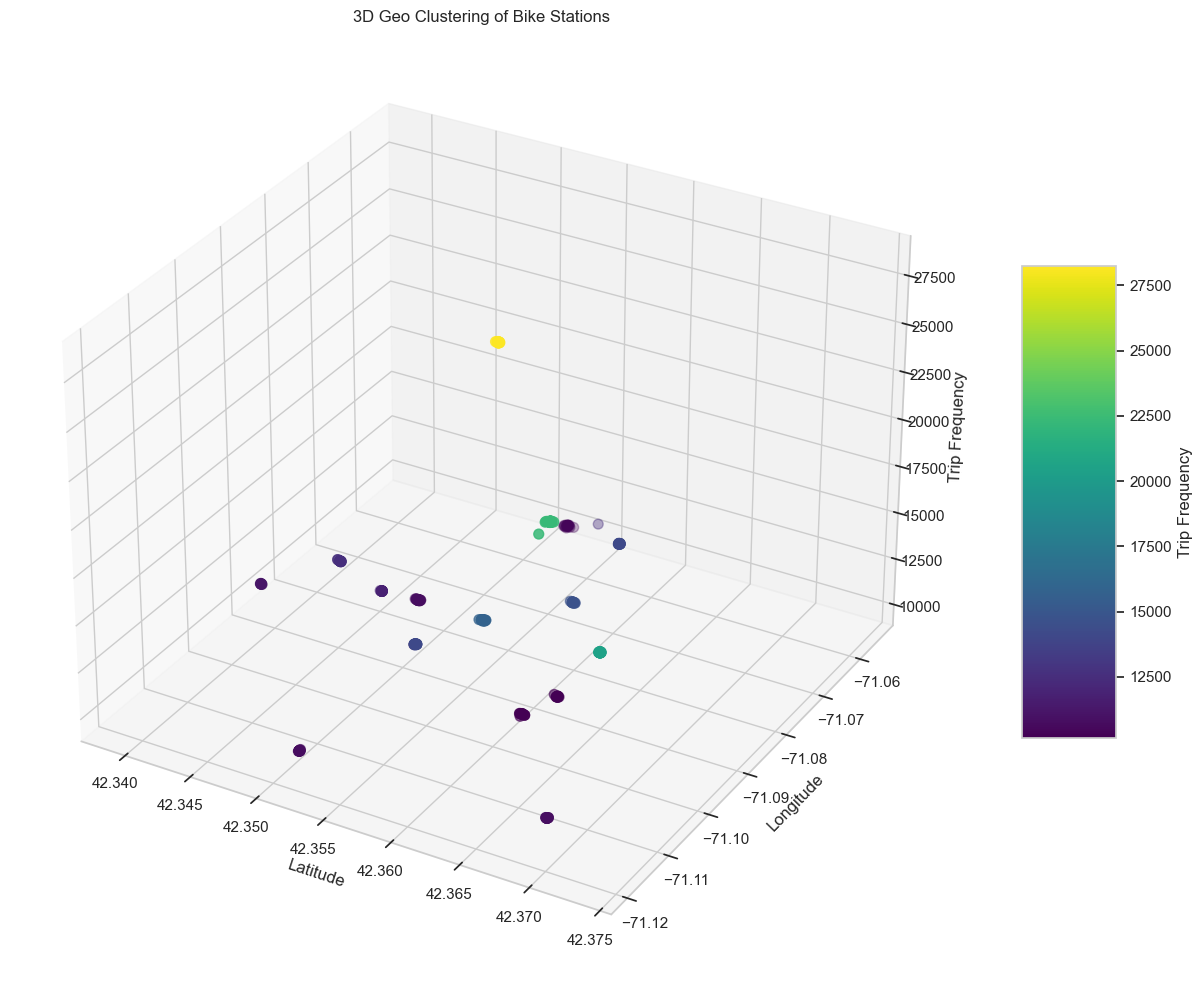

In [33]:
stations_with_frequency_more_than_10000 = filtered_df_10k[['start_station_name', 'start_lat', 'start_lng', 'trip_frequency']].drop_duplicates()

# Increasing the figure size
fig = plt.figure(figsize=(14, 10))  # Width, Height in inches
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for latitude, longitude, and trip frequency with larger point size
# and a color map that reflects the trip frequency
sc = ax.scatter(stations_with_frequency_more_than_10000['start_lat'], 
                stations_with_frequency_more_than_10000['start_lng'], 
                stations_with_frequency_more_than_10000['trip_frequency'],
                c=stations_with_frequency_more_than_10000['trip_frequency'],  # Color by trip frequency
                cmap='viridis',  # Color map
                s=50)  # Point size

# Adding a color bar
cbar = plt.colorbar(sc, shrink=0.5, aspect=5)
cbar.set_label('Trip Frequency')

# Labels and titles
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Trip Frequency')
plt.title('3D Geo Clustering of Bike Stations')

# Enhancing the plot aesthetics
ax.grid(True)  
plt.tight_layout()  

# Showing the plot
plt.show()

In [34]:
# Create a map centered around Boston
map_boston = folium.Map(location=[42.3601, -71.0589], zoom_start=13)

# Heatmap for start stations
start_coords = filtered_df_10k[['start_lat', 'start_lng']].dropna()
HeatMap(data=start_coords, radius=15).add_to(map_boston)

# Heatmap for end stations
end_coords = filtered_df_10k[['end_lat', 'end_lng']].dropna()
HeatMap(data=end_coords, radius=15).add_to(map_boston)

# Display the map
map_boston.save('filtered_10k_boston_bike_stations_heatmap.html')

### >> **We can see that a lot of data is lost when we filter for trip frequency > 10000, so we stick to the trip frequency being greater than 5000 for our clustering**

In [35]:
filtered_df.head()

,ride_id,rideable_type,started_at,ended_at,duration_minutes,trip_distance,start_station_id,start_station_name,end_station_name,end_station_id,...,end_lng,season,AvgTemp,member_casual,start_hour,end_hour,start_day,start_month,start_day_of_week,trip_frequency
16,85A52A54DC77E832,docked_bike,2023-04-13 17:55:22,2023-04-13 18:09:57,14.583333,1.877944,M32055,Harvard St at Greene-Rose Heritage Park,Lesley University,M32039,...,-71.119019,spring,68.5,member,17,17,3,4,Thursday,5760
17,17A0784E0EAE3DE2,docked_bike,2023-04-27 17:26:03,2023-04-27 17:42:33,16.500000,1.329318,M32026,359 Broadway - Broadway at Fayette Street,Lesley University,M32039,...,-71.119019,spring,50.5,member,17,17,3,4,Thursday,5832
22,898C9A7B7C01D1CE,docked_bike,2023-04-13 20:09:14,2023-04-13 20:16:01,6.783333,0.328890,M32055,Harvard St at Greene-Rose Heritage Park,Mass Ave at Albany St,M32061,...,-71.096703,spring,68.5,member,20,20,3,4,Thursday,5760
23,0C3C85353AC1D0A0,docked_bike,2023-04-22 18:43:04,2023-04-22 19:05:06,22.033333,2.772623,M32026,359 Broadway - Broadway at Fayette Street,Lewis Wharf at Atlantic Ave,D32006,...,-71.050877,spring,48.0,member,18,18,5,4,Saturday,5832
24,427BDC3864BACB22,docked_bike,2023-04-29 12:52:25,2023-04-29 12:59:52,7.450000,0.761536,M32026,359 Broadway - Broadway at Fayette Street,Mass Ave at Albany St,M32061,...,-71.096703,spring,50.0,member,12,12,5,4,Saturday,5832


# **Data Prep For Clustering**

# **We do not include end coordinates, as in the initial attempt we focus to optimize the placement of bike stations based on where users prefer to pick up bikes**

### **Given our project's objective to optimize bike station placement and improve service efficiency, our clustering should aim to capture patterns related to `bike usage` `frequency`, `demographics`, and `environmental factors` that could influence bike-sharing behaviors.**

For our `clustering_df`, The following features will affect the clustering process:

1. **Geographical Features**:
   - `start_lat`: Latitude of the start station.
   - `start_lng`: Longitude of the start station.
   These are crucial for identifying spatial patterns and clustering stations based on location.

2. **Temporal Features**:
   - `start_hour`: Hour of the day when the trip started.
   - `start_day`: Day of the month.
   - `start_month`: Month of the year.
   - `start_day_of_week`: Day of the week.
   Temporal features can help identify usage patterns related to time.

3. **Weather Features**:
   - `AvgTemp`: Average temperature might influence the willingness to use a bike.

4. **Trip Features**:
   - `duration_minutes`: Duration of the trip.
   - `trip_distance`: Distance of the trip.
   These features can help understand the nature of the trips.

5. **Usage Frequency**:
   - `trip_frequency`: The frequency of trips started or ended at the station.
   This is your target feature for optimization, indicating the popularity or demand of the station.

6. **Categorical Features**:
   - `season`: Season of the year may affect usage.
   - `member_casual`: Type of user could indicate different usage patterns.
   - `rideable_type`: Type of bike might influence the preference or usage.

For the categorical features, we will need to convert them into a numerical format suitable for clustering. This can be done using one-hot encoding or label encoding. 

In [36]:
clustering_df = filtered_df[['start_lat', 'start_lng', 'duration_minutes', 'trip_distance', 'trip_frequency', 'season', 'AvgTemp', 'start_month', 'start_day', 'start_hour', 'member_casual', 'rideable_type']]

# 'end_lat','end_lng' 'ride_id'

### **>> Note: Temporal ranges start from 0 i.e. for the 7 days of the week the mapping is 0-6, similarly 0-23 for hours**

### **Categorical Conversion** 
### - Using Ordinal Mapping for `season` as they inherit a natural order,  while `member_casual` and `rideable_type` will be encoded using One-Hot encoding

In [37]:
seasonal_order = {
    'spring' : 1,
    'summer' : 2,
    'fall' : 3,
    'winter' : 4
}

clustering_df['season_ordinal'] = clustering_df['season'].map(seasonal_order)

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_938/2497365533.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['season_ordinal'] = clustering_df['season'].map(seasonal_order)


In [38]:
for i in ["member_casual", 'rideable_type']:
    print(df[i].value_counts(), '\n')

member_casual
member    953715
casual    351986
Name: count, dtype: int64 

rideable_type
docked_bike      1136847
classic_bike      165953
electric_bike       2901
Name: count, dtype: int64 



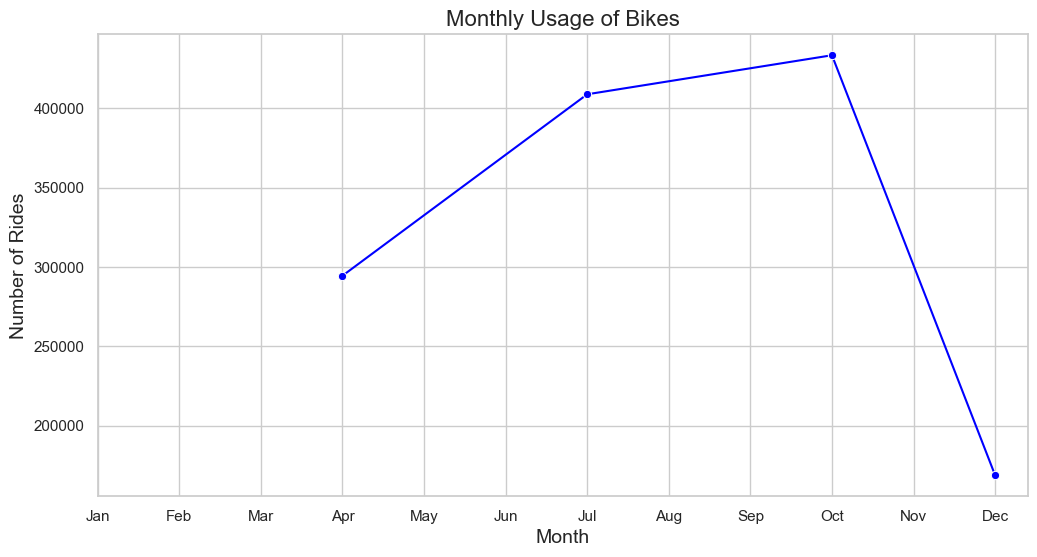

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=clustering_df.groupby('start_month').size().index, y=df.groupby('start_month').size().values, marker='o', linestyle='-', color='blue')
plt.title('Monthly Usage of Bikes', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


In [62]:
# One-hot encode 'member_casual' and 'rideable_type' columns and join back to the clustering_df
# clustering_df = pd.concat([
#     clustering_df,
#     pd.get_dummies(clustering_df['member_casual'], prefix='member_type'),
#     pd.get_dummies(clustering_df['rideable_type'], prefix='bike_type')], 
#     axis=1
# )

# clustering_df.drop(['member_type_casual', 'member_type_member', 'bike_type_classic_bike',
#        'bike_type_docked_bike', 'bike_type_electric_bike'], inplace=True, axis = 1)


In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Defining the transformer with OneHotEncoder for categorical features
categorical_features = ['member_casual', 'rideable_type']
one_hot_encoder = OneHotEncoder()

# Creating a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # This will keep all other columns untouched
)

# Fit and transform the DataFrame
clustering_df_encoded = preprocessor.fit_transform(clustering_df)

# To get feature names after one hot encoding (useful for making sense of the output)
feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Convert the output back to a DataFrame, if needed
clustering_df_encoded = pd.DataFrame(clustering_df_encoded, columns=feature_names + list(clustering_df.drop(categorical_features, axis=1).columns))


In [41]:
# Removing the season column
clustering_df_encoded.drop('season', inplace=True, axis=1)

In [42]:
clustering_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712771 entries, 16 to 1305574
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_lat         712771 non-null  float64
 1   start_lng         712771 non-null  float64
 2   duration_minutes  712771 non-null  float64
 3   trip_distance     712771 non-null  float64
 4   trip_frequency    712771 non-null  int64  
 5   season            712771 non-null  object 
 6   AvgTemp           712771 non-null  float64
 7   start_month       712771 non-null  int32  
 8   start_day         712771 non-null  int32  
 9   start_hour        712771 non-null  int32  
 10  member_casual     712771 non-null  object 
 11  rideable_type     712771 non-null  object 
 12  season_ordinal    712771 non-null  int64  
dtypes: float64(5), int32(3), int64(2), object(3)
memory usage: 68.0+ MB


### **Normalizing the Data**

In [43]:
clustering_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712771 entries, 0 to 712770
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   member_casual_casual         712771 non-null  object
 1   member_casual_member         712771 non-null  object
 2   rideable_type_classic_bike   712771 non-null  object
 3   rideable_type_docked_bike    712771 non-null  object
 4   rideable_type_electric_bike  712771 non-null  object
 5   start_lat                    712771 non-null  object
 6   start_lng                    712771 non-null  object
 7   duration_minutes             712771 non-null  object
 8   trip_distance                712771 non-null  object
 9   trip_frequency               712771 non-null  object
 10  AvgTemp                      712771 non-null  object
 11  start_month                  712771 non-null  object
 12  start_day                    712771 non-null  object
 13  start_hour    

### Specifying datatypes after one hot encoding

In [44]:
# Converting specific columns to float or int as appropriate
float_cols = ['start_lat', 'start_lng', 'duration_minutes', 'trip_distance', 'AvgTemp']
int_cols = ['trip_frequency', 'start_month', 'start_day', 'start_hour', 'season_ordinal']

# Using .astype() to convert column types
clustering_df_encoded[float_cols] = clustering_df_encoded[float_cols].astype(float)
clustering_df_encoded[int_cols] = clustering_df_encoded[int_cols].astype(int)

# For the one-hot encoded columns, they should also be integers (0 or 1)
one_hot_cols = ['member_casual_casual', 'member_casual_member', 'rideable_type_classic_bike', 
                'rideable_type_docked_bike', 'rideable_type_electric_bike']
clustering_df_encoded[one_hot_cols] = clustering_df_encoded[one_hot_cols].astype(int)

# Checking the dtypes again
clustering_df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712771 entries, 0 to 712770
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_casual_casual         712771 non-null  int64  
 1   member_casual_member         712771 non-null  int64  
 2   rideable_type_classic_bike   712771 non-null  int64  
 3   rideable_type_docked_bike    712771 non-null  int64  
 4   rideable_type_electric_bike  712771 non-null  int64  
 5   start_lat                    712771 non-null  float64
 6   start_lng                    712771 non-null  float64
 7   duration_minutes             712771 non-null  float64
 8   trip_distance                712771 non-null  float64
 9   trip_frequency               712771 non-null  int64  
 10  AvgTemp                      712771 non-null  float64
 11  start_month                  712771 non-null  int64  
 12  start_day                    712771 non-null  int64  
 13 

In [45]:
clustering_df_encoded.columns

Index(['member_casual_casual', 'member_casual_member',
       'rideable_type_classic_bike', 'rideable_type_docked_bike',
       'rideable_type_electric_bike', 'start_lat', 'start_lng',
       'duration_minutes', 'trip_distance', 'trip_frequency', 'AvgTemp',
       'start_month', 'start_day', 'start_hour', 'season_ordinal'],
      dtype='object')

### **Given that your geographic coordinates are concentrated within a relatively small area—a 12-mile radius around Boston with some surrounding suburbs—the distortion caused by treating latitude and longitude as Euclidean coordinates should be minimal. This is because, over short distances, the Earth's surface can be reasonably approximated as flat, and therefore, the Euclidean distance can be a good proxy for actual geographic distance.**

### **Considering the following heatmap, which shows a concentration of activity within a specific urban area, and ourchoice of HDBSCAN, which is a density-based clustering method that can handle varied densities and is less sensitive to the "curse of dimensionality," we have some flexibility in your approach to normalization:**
Given that your geographic coordinates are concentrated within a relatively small area—a 12-mile radius around Boston with some surrounding suburbs—the distortion caused by treating latitude and longitude as Euclidean coordinates should be minimal. This is because, over short distances, the Earth's surface can be reasonably approximated as flat, and therefore, the Euclidean distance can be a good proxy for actual geographic distance.

Considering the heatmap you provided, which shows a concentration of activity within a specific urban area, and your choice of HDBSCAN, which is a density-based clustering method that can handle varied densities and is less sensitive to the "curse of dimensionality," you have some flexibility in your approach to normalization:

### Normalization Approach for Geo Coordinates + Other Data

1. **HDBSCAN without Normalization of Geo Coordinates**:
   - We can apply HDBSCAN directly to the geographic coordinates without normalization, as HDBSCAN is adept at handling different scales and does not necessarily require all features to be on the same scale.
   - We would normalize the non-geographic features separately if they are on vastly different scales or have very different variances.

2. **Minimal Distortion Normalization**:
   - Since the area is relatively small and we are looking at urbam analytics, a simple Min-Max scaling to normalize your features could suffice. It will preserve the relative distances between points.
   - Using Min-Max scaling on latitude and longitude to ensure we have a similar scale to our other features, such as temperature, trip frequency, etc.



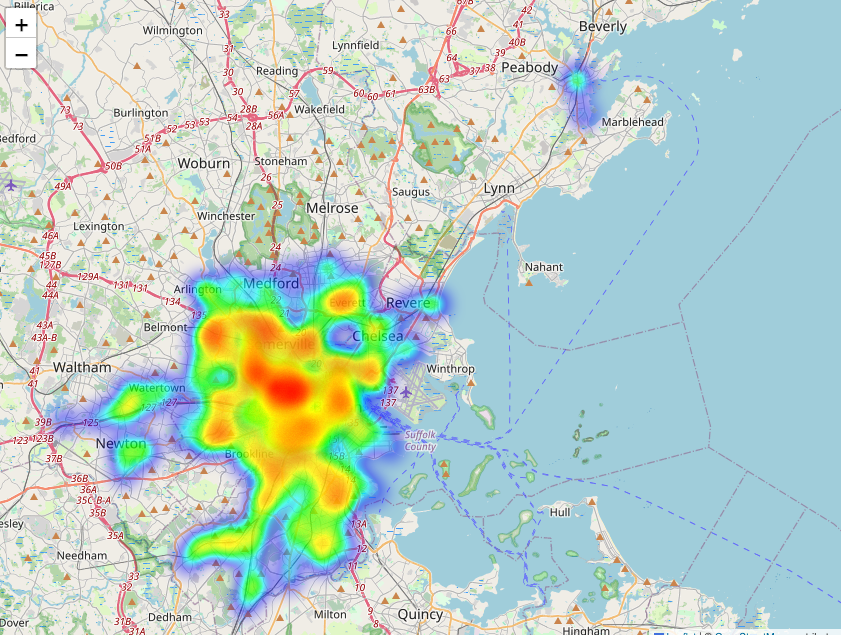

In [ ]:
# features_to_visualize = ['duration_minutes', 'trip_distance', 'AvgTemp', 'trip_frequency', 
#                          'start_month', 'start_day', 'start_hour', 'season_ordinal']

# # Plot histograms for each feature to visualize distributions
# for feature in features_to_visualize:
#     plt.figure(figsize=(10, 4))
#     sns.histplot(clustering_df_encoded[feature], kde=True)
#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Frequency')
#     plt.show()

# # Plot boxplots for each feature to visualize outliers
# for feature in features_to_visualize:
#     plt.figure(figsize=(10, 4))
#     sns.boxplot(x=clustering_df_encoded[feature])
#     plt.title(f'Boxplot of {feature}')
#     plt.xlabel(feature)
#     plt.show()


### **1. HDBSCAN without Normalization of Geo Coordinates**:


In [46]:
from sklearn.preprocessing import MinMaxScaler
import hdbscan


In [47]:
# Defining features to scale
features_to_scale = ['duration_minutes', 'trip_distance', 'AvgTemp', 'trip_frequency', 
                     'start_month', 'start_day', 'start_hour', 'season_ordinal']

# Initializeing the scaler
scaler = MinMaxScaler()

# Fitting and transforming the features
clustering_df_encoded[features_to_scale] = scaler.fit_transform(clustering_df_encoded[features_to_scale])


In [44]:
clustering_df_encoded

,member_casual_casual,member_casual_member,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,start_lat,start_lng,duration_minutes,trip_distance,trip_frequency,AvgTemp,start_month,start_day,start_hour,season_ordinal
0,0,1,0,1,0,42.365994,-71.095222,14.583333,1.877944,5760,68.5,4,3,17,1
1,0,1,0,1,0,42.370803,-71.104412,16.500000,1.329318,5832,50.5,4,3,17,1
2,0,1,0,1,0,42.365994,-71.095222,6.783333,0.328890,5760,68.5,4,3,20,1
3,0,1,0,1,0,42.370803,-71.104412,22.033333,2.772623,5832,48.0,4,5,18,1
4,0,1,0,1,0,42.370803,-71.104412,7.450000,0.761536,5832,50.0,4,5,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712766,0,1,1,0,0,42.365673,-71.064263,9.433333,1.188867,6372,34.5,12,4,7,4
712767,0,1,1,0,0,42.351692,-71.119035,6.433333,0.765234,10754,53.0,12,6,21,4
712768,0,1,1,0,0,42.351692,-71.119035,9.366667,0.765234,10754,53.0,12,6,11,4
712769,0,1,1,0,0,42.351692,-71.119035,20.300000,1.829355,10754,42.5,12,5,18,4


# Choosing the number for the parameter `min_cluster_size` for the HDBSCAN Algorithm

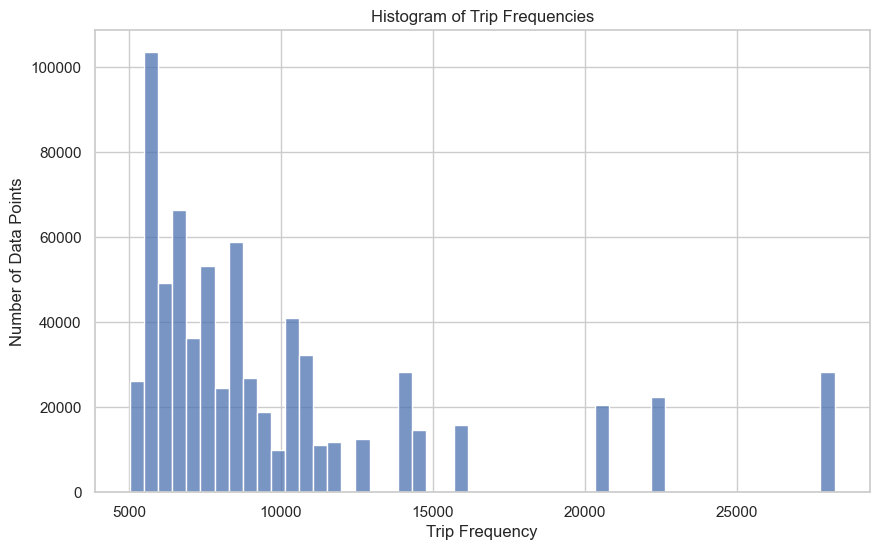

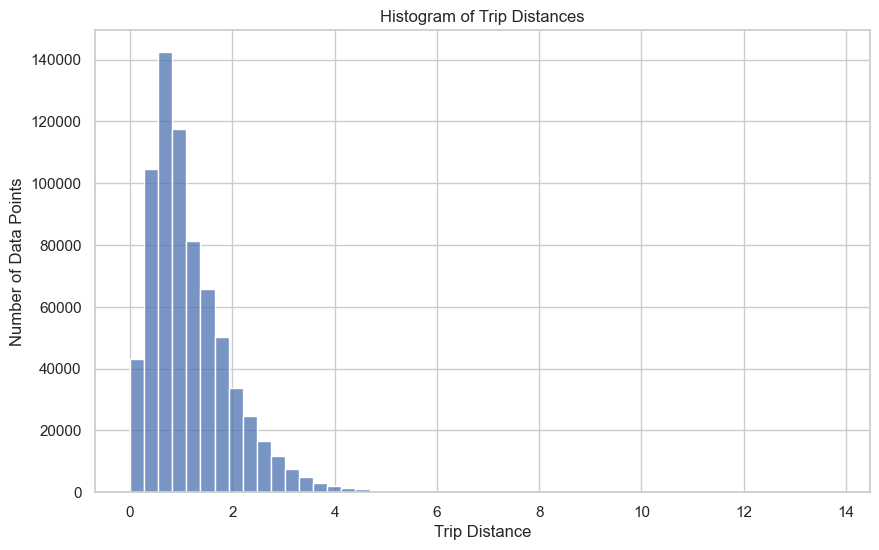

In [48]:
# Histogram of trip frequencies
plt.figure(figsize=(10, 6))
sns.histplot(clustering_df['trip_frequency'], bins=50, kde=False)
plt.title('Histogram of Trip Frequencies')
plt.xlabel('Trip Frequency')
plt.ylabel('Number of Data Points')
plt.show()

# Histogram of trip distances
plt.figure(figsize=(10, 6))
sns.histplot(clustering_df['trip_distance'], bins=50, kde=False)
plt.title('Histogram of Trip Distances')
plt.xlabel('Trip Distance')
plt.ylabel('Number of Data Points')
plt.show()


### Suggested Parameter for HDBS
Considering the trip frequency histogram, we might start with a `min_cluster_size` of around 500 to exclude the noise from very small clusters and focus on more significant patterns. We can then adjust this parameter upwards if you find too many small clusters or downwards if you're missing meaningful clusters.




In [124]:
# clustering_df_encoded.drop('clusters', inplace=True, axis=1)

In [51]:
clustering_df_encoded.head()

,member_casual_casual,member_casual_member,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,start_lat,start_lng,duration_minutes,trip_distance,trip_frequency,AvgTemp,start_month,start_day,start_hour,season_ordinal
0,0,1,0,1,0,42.365994,-71.095222,0.000231,0.136330,0.031596,0.745455,0.0,0.500000,0.739130,0.0
1,0,1,0,1,0,42.370803,-71.104412,0.000257,0.096502,0.034700,0.418182,0.0,0.500000,0.739130,0.0
2,0,1,0,1,0,42.365994,-71.095222,0.000129,0.023876,0.031596,0.745455,0.0,0.500000,0.869565,0.0
3,0,1,0,1,0,42.370803,-71.104412,0.000329,0.201279,0.034700,0.372727,0.0,0.833333,0.782609,0.0
4,0,1,0,1,0,42.370803,-71.104412,0.000137,0.055284,0.034700,0.409091,0.0,0.833333,0.521739,0.0


In [52]:
# Initializing the model
clusterer = hdbscan.HDBSCAN(min_cluster_size=500, gen_min_span_tree=True)

# Fitting the model
clusterer.fit(clustering_df_encoded)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=500)

In [53]:
clustering_df_encoded

,member_casual_casual,member_casual_member,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,start_lat,start_lng,duration_minutes,trip_distance,trip_frequency,AvgTemp,start_month,start_day,start_hour,season_ordinal
0,0,1,0,1,0,42.365994,-71.095222,0.000231,0.136330,0.031596,0.745455,0.0,0.500000,0.739130,0.0
1,0,1,0,1,0,42.370803,-71.104412,0.000257,0.096502,0.034700,0.418182,0.0,0.500000,0.739130,0.0
2,0,1,0,1,0,42.365994,-71.095222,0.000129,0.023876,0.031596,0.745455,0.0,0.500000,0.869565,0.0
3,0,1,0,1,0,42.370803,-71.104412,0.000329,0.201279,0.034700,0.372727,0.0,0.833333,0.782609,0.0
4,0,1,0,1,0,42.370803,-71.104412,0.000137,0.055284,0.034700,0.409091,0.0,0.833333,0.521739,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712766,0,1,1,0,0,42.365673,-71.064263,0.000164,0.086306,0.057977,0.127273,1.0,0.666667,0.304348,1.0
712767,0,1,1,0,0,42.351692,-71.119035,0.000124,0.055552,0.246864,0.463636,1.0,1.000000,0.913043,1.0
712768,0,1,1,0,0,42.351692,-71.119035,0.000163,0.055552,0.246864,0.463636,1.0,1.000000,0.478261,1.0
712769,0,1,1,0,0,42.351692,-71.119035,0.000307,0.132803,0.246864,0.272727,1.0,0.833333,0.782609,1.0


In [54]:
# Adding the cluster labels to the DataFrame
clustering_df_encoded['clusters'] = clusterer.labels_
cluster_sizes = clustering_df_encoded['clusters'].value_counts()

In [55]:
clustering_df_encoded['clusters'].max()

43

In [ ]:
# # Plotting the single linkage tree
# clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
# plt.show()

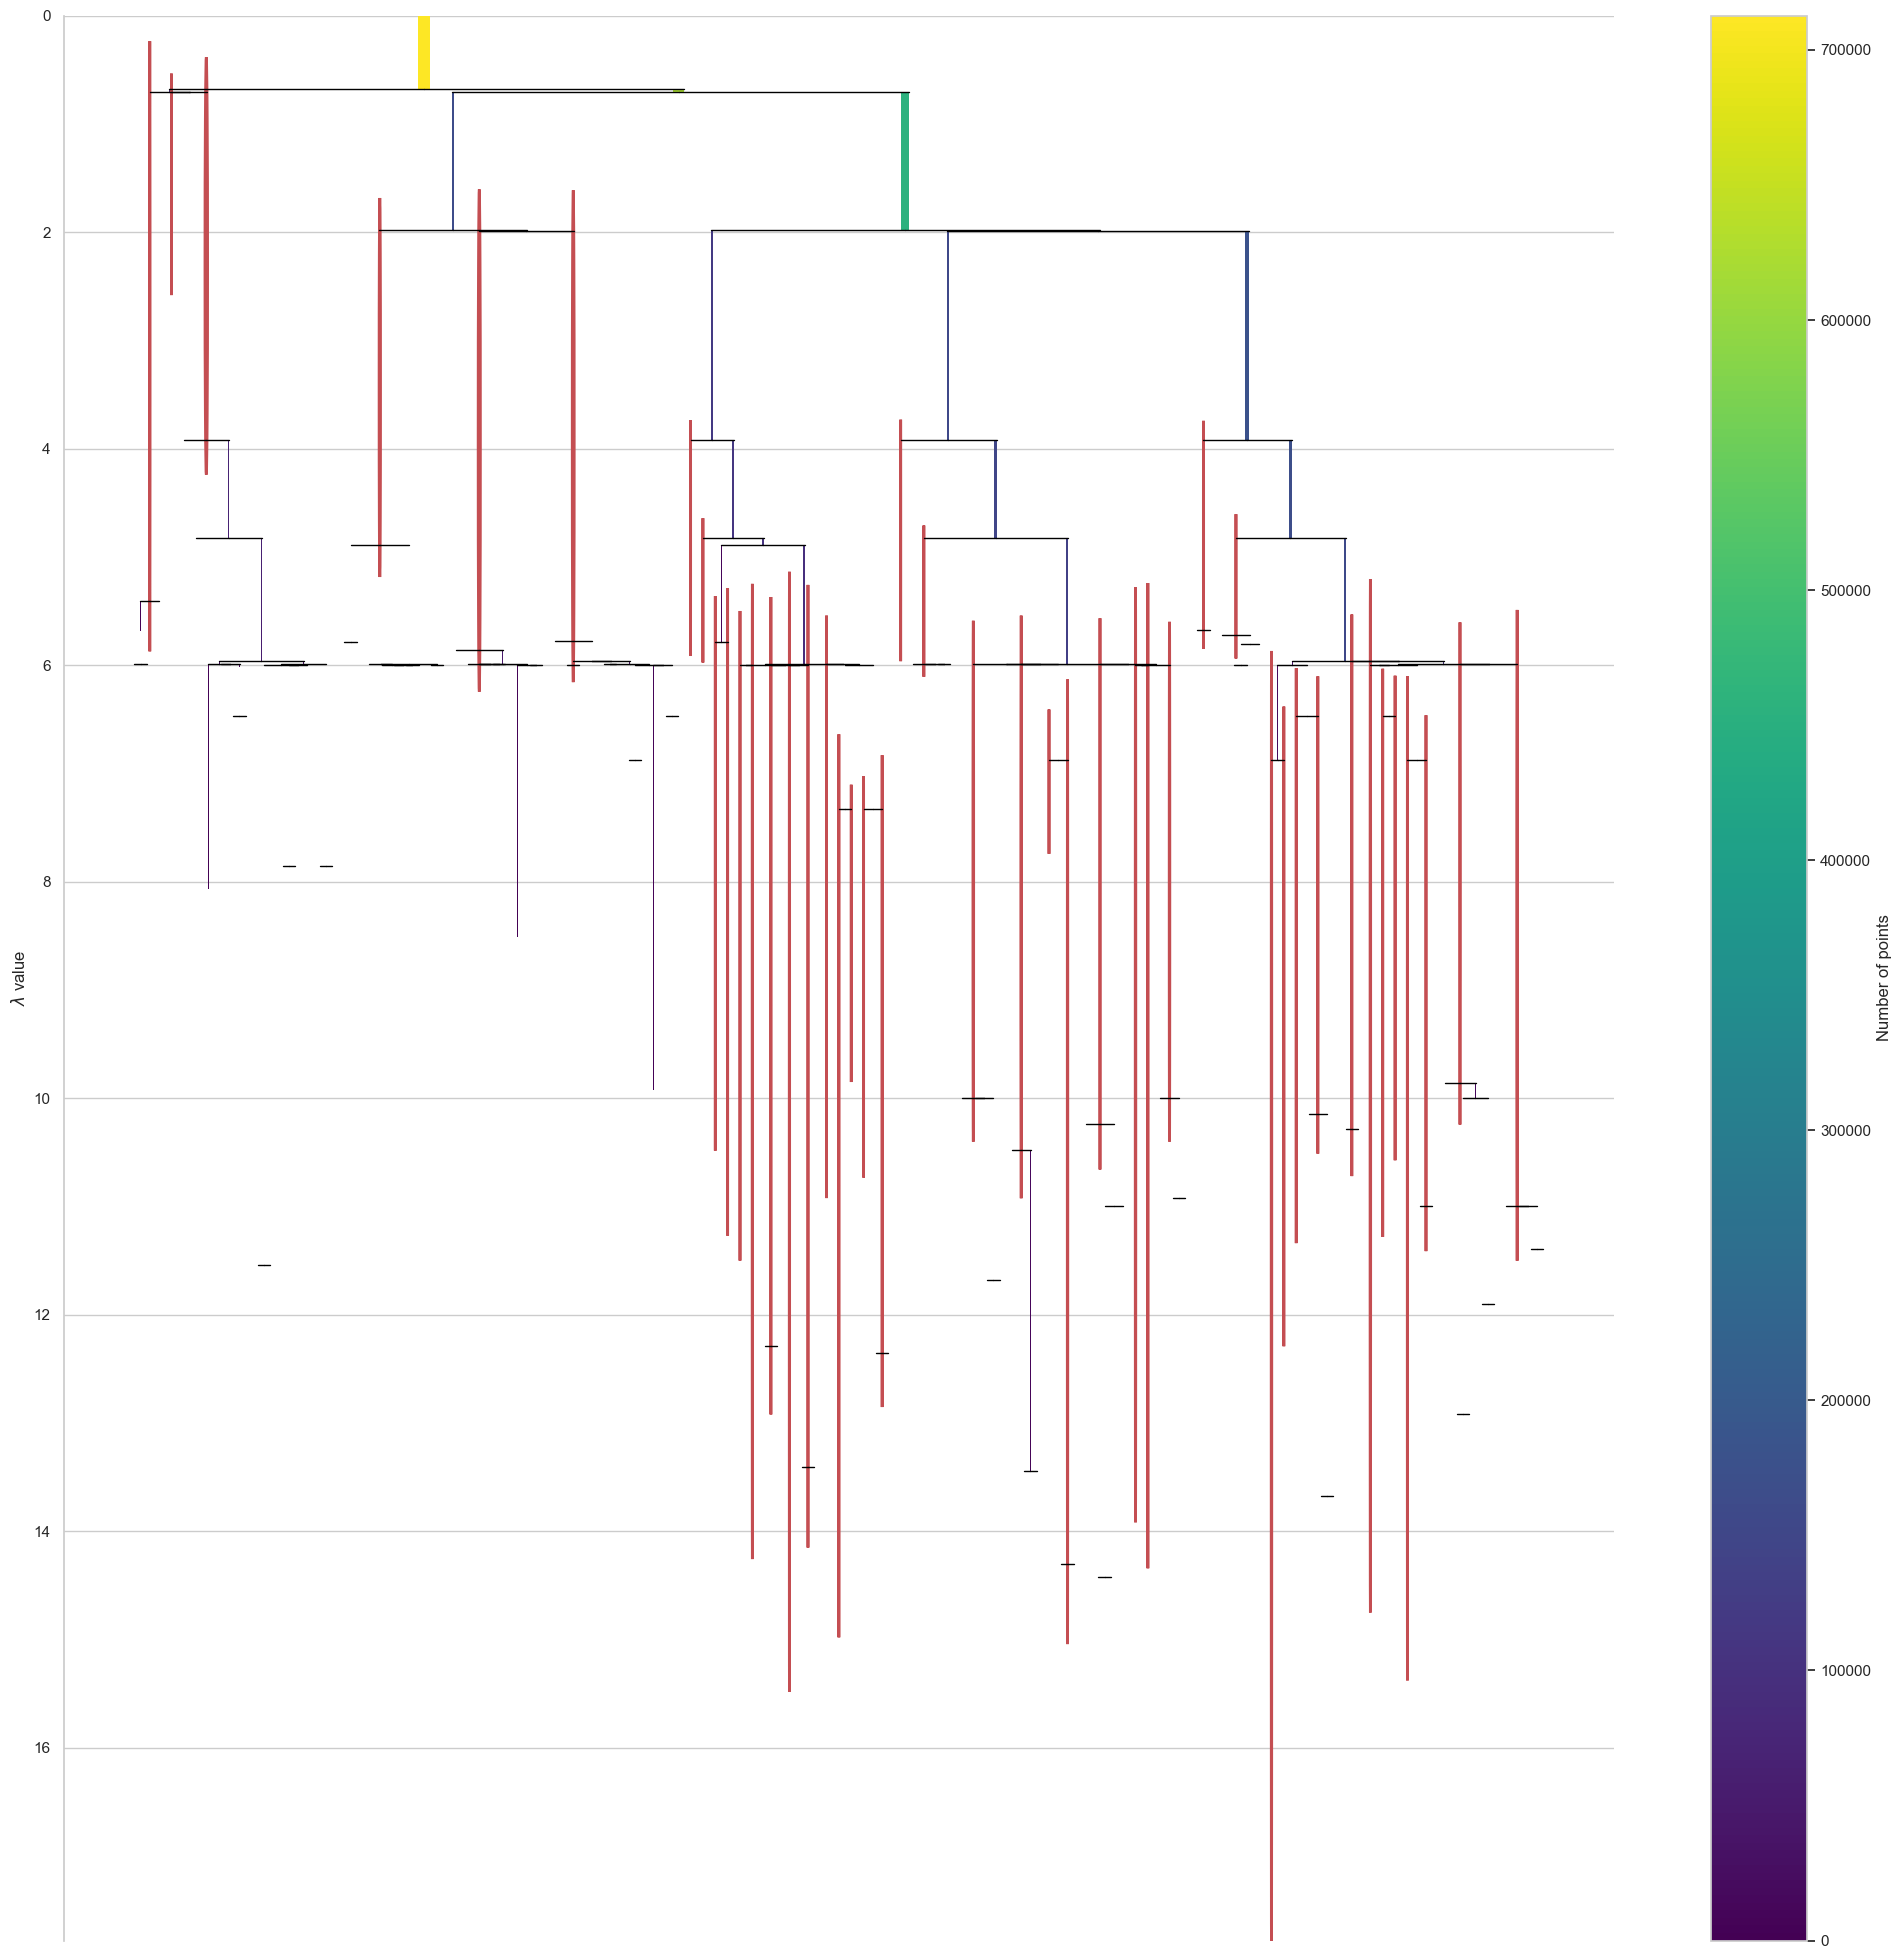

In [57]:
# Plotting the condensed tree
plt.figure(figsize=(25,25))

clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))
plt.show()

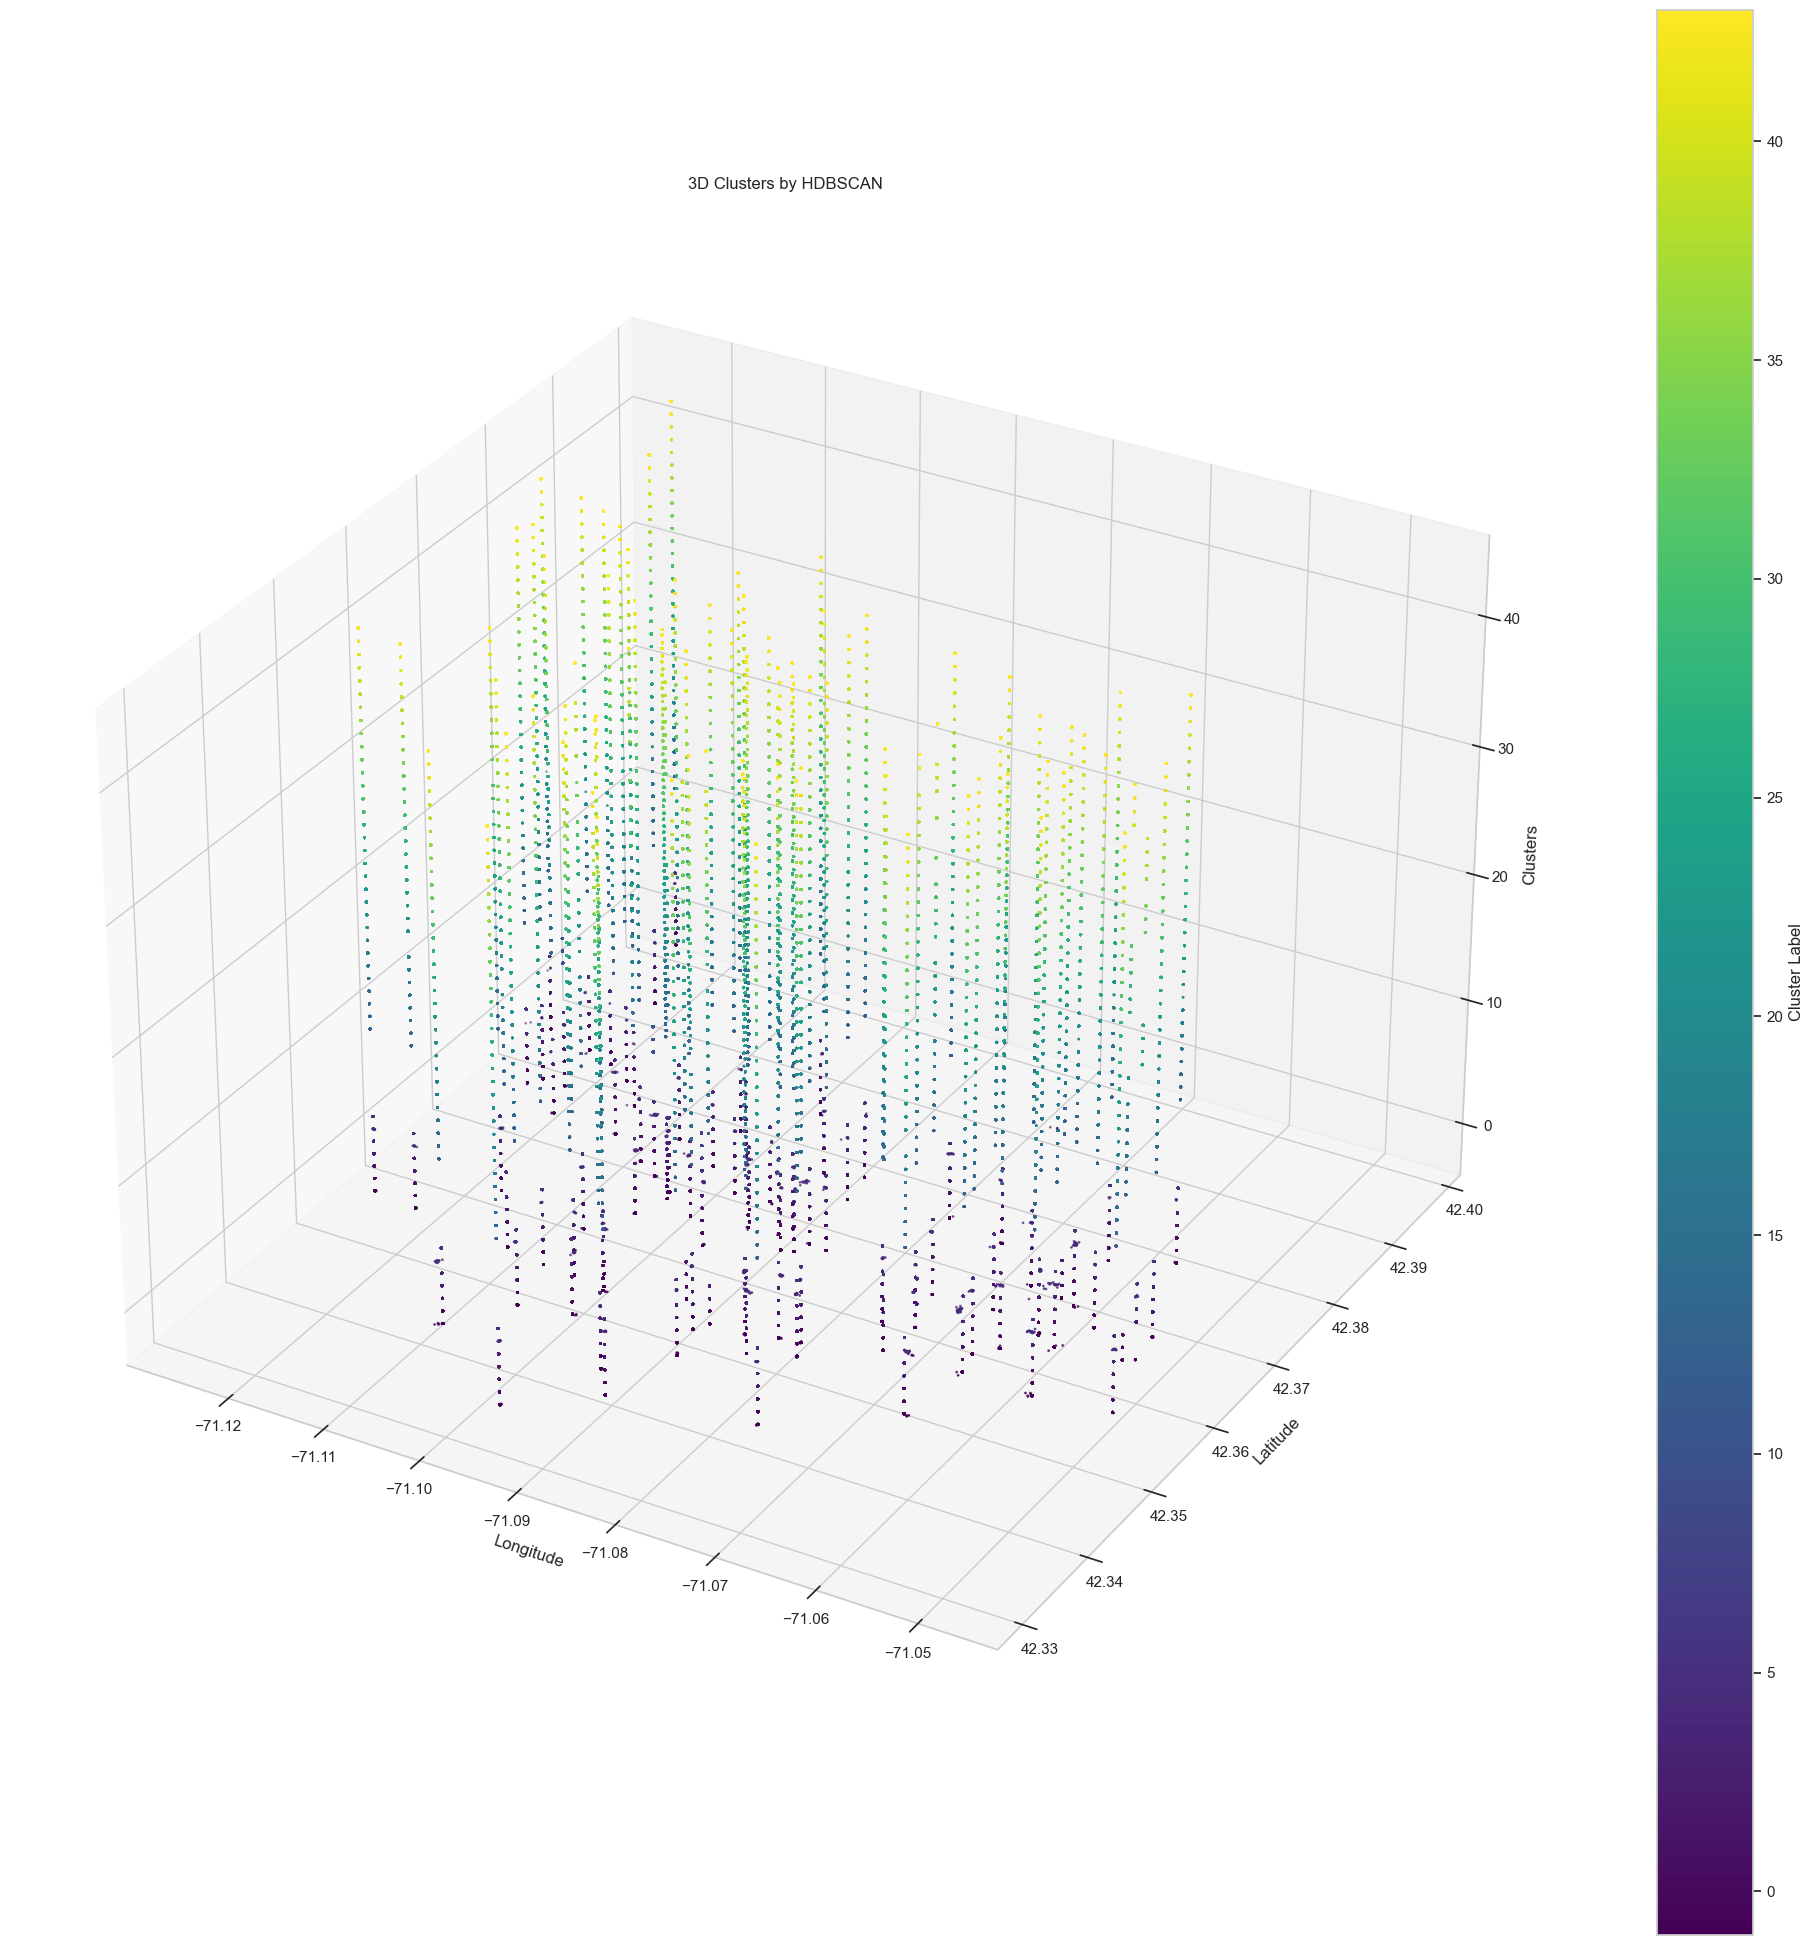

In [92]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3D visualization
sc = ax.scatter(
    clustering_df_encoded['start_lng'],
    clustering_df_encoded['start_lat'],
    clustering_df_encoded['clusters'],  # Replace with your third dimension
    c=clustering_df_encoded['clusters'],
    cmap='viridis',
    s=1
)

# Setting labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Clusters')  # Replace with your third dimension label

# Title and colorbar
plt.title('3D Clusters by HDBSCAN')
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Cluster Label')

plt.show()


In [98]:
# import folium
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# import numpy as np
# from shapely.geometry import MultiPoint, Point, Polygon

# # Assuming clustering_df_encoded is your DataFrame ready for plotting

# # Create a map centered around Boston
# boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# # Define the number of clusters excluding noise
# num_clusters = len(set(clustering_df_encoded['clusters'])) - (1 if -1 in clustering_df_encoded['clusters'] else 0)

# # Generate colors for each cluster
# colors = plt.cm.Spectral(np.linspace(0, 1, num_clusters))
# colors_hex = list(map(mcolors.rgb2hex, colors))

# # Create a dictionary to map cluster labels to colors, skipping the noise label (-1) if present
# cluster_colors = {k: colors_hex[k] for k in range(num_clusters)}

# # Plot all points
# for _, row in clustering_df_encoded.iterrows():
#     cluster_label = row['clusters']
#     # Assign a color to noise points if needed
#     cluster_color = cluster_colors.get(cluster_label, '#808080')  # Default to grey for noise
#     folium.CircleMarker(
#         location=[row['start_lat'], row['start_lng']],
#         radius=2,
#         color=cluster_color,
#         fill=True,
#         fill_color=cluster_color,
#         fill_opacity=0.6
#     ).add_to(boston_map)

# # Draw cluster perimeters using convex hulls
# for cluster_label in range(num_clusters):
#     # Get points in the cluster
#     points_in_cluster = clustering_df_encoded[clustering_df_encoded['clusters'] == cluster_label][['start_lat', 'start_lng']]
#     if len(points_in_cluster) > 2:  # Convex hull needs at least 3 points
#         # Convert DataFrame to a list of shapely Point objects
#         points = [Point(row['start_lng'], row['start_lat']) for _, row in points_in_cluster.iterrows()]
#         # Create a MultiPoint object from the list of points
#         multi_point = MultiPoint(points)
#         # Compute the convex hull
#         convex_hull_polygon = multi_point.convex_hull

#         # Check if the convex hull is a Polygon before attempting to draw it
#         if isinstance(convex_hull_polygon, Polygon):
#             # Get exterior coordinates of the polygon
#             hull_coords = list(convex_hull_polygon.exterior.coords)
#             # Create a folium Polygon and add to the map
#             folium.Polygon(
#                 locations=hull_coords,
#                 color=cluster_colors[cluster_label],
#                 fill_color=cluster_colors[cluster_label],
#                 fill_opacity=0.2
#             ).add_to(boston_map)
#         # Additional handling for other geometries (e.g., LineString, Point) can be added here if needed

# # Save the map to an HTML file
# boston_map.save('boston_clusters_with_perimeters.html')


In [72]:
cluster_info_1 = clustering_df_encoded.groupby('clusters').mean()
cluster_info_2 = clustering_df_encoded.groupby('clusters').count()

In [73]:
cluster_info_1= cluster_info_1.reset_index()
cluster_info_2= cluster_info_2.reset_index()


In [121]:
cluster_info_2

,clusters,member_casual_casual,member_casual_member,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,start_lat,start_lng,duration_minutes,trip_distance,trip_frequency,AvgTemp,start_month,start_day,start_hour,season_ordinal
0,-1,48755,48755,48755,48755,48755,48755,48755,48755,48755,48755,48755,48755,48755,48755,48755
1,0,41092,41092,41092,41092,41092,41092,41092,41092,41092,41092,41092,41092,41092,41092,41092
2,1,64162,64162,64162,64162,64162,64162,64162,64162,64162,64162,64162,64162,64162,64162,64162
3,2,56949,56949,56949,56949,56949,56949,56949,56949,56949,56949,56949,56949,56949,56949,56949
4,3,16971,16971,16971,16971,16971,16971,16971,16971,16971,16971,16971,16971,16971,16971,16971
5,4,1204,1204,1204,1204,1204,1204,1204,1204,1204,1204,1204,1204,1204,1204,1204
6,5,75926,75926,75926,75926,75926,75926,75926,75926,75926,75926,75926,75926,75926,75926,75926
7,6,5357,5357,5357,5357,5357,5357,5357,5357,5357,5357,5357,5357,5357,5357,5357
8,7,7309,7309,7309,7309,7309,7309,7309,7309,7309,7309,7309,7309,7309,7309,7309
9,8,4544,4544,4544,4544,4544,4544,4544,4544,4544,4544,4544,4544,4544,4544,4544


### **2. HDBSCAN with Normalization of Geo Coordinates**:


In [80]:
clustering_df

,start_lat,start_lng,duration_minutes,trip_distance,trip_frequency,season,AvgTemp,start_month,start_day,start_hour,member_casual,rideable_type,season_ordinal
16,42.365994,-71.095222,14.583333,1.877944,5760,spring,68.5,4,3,17,member,docked_bike,1
17,42.370803,-71.104412,16.500000,1.329318,5832,spring,50.5,4,3,17,member,docked_bike,1
22,42.365994,-71.095222,6.783333,0.328890,5760,spring,68.5,4,3,20,member,docked_bike,1
23,42.370803,-71.104412,22.033333,2.772623,5832,spring,48.0,4,5,18,member,docked_bike,1
24,42.370803,-71.104412,7.450000,0.761536,5832,spring,50.0,4,5,12,member,docked_bike,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305569,42.365673,-71.064263,9.433333,1.188867,6372,winter,34.5,12,4,7,member,classic_bike,4
1305570,42.351692,-71.119035,6.433333,0.765234,10754,winter,53.0,12,6,21,member,classic_bike,4
1305571,42.351692,-71.119035,9.366667,0.765234,10754,winter,53.0,12,6,11,member,classic_bike,4
1305573,42.351692,-71.119035,20.300000,1.829355,10754,winter,42.5,12,5,18,member,classic_bike,4


### **Re encoding + normalizing variables**

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Defining the transformer with OneHotEncoder for categorical features
categorical_features = ['member_casual', 'rideable_type']
one_hot_encoder = OneHotEncoder()

# Creating a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # This will keep all other columns untouched
)

# Fit and transform the DataFrame
clustering_df_encoded_with_Geo = preprocessor.fit_transform(clustering_df)

# To get feature names after one hot encoding (useful for making sense of the output)
feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Convert the output back to a DataFrame, if needed
clustering_df_encoded_with_Geo = pd.DataFrame(clustering_df_encoded_with_Geo, columns=feature_names + list(clustering_df.drop(categorical_features, axis=1).columns))


In [83]:
clustering_df_encoded_with_Geo.drop('season', inplace=True, axis=1)

In [85]:
clustering_df_encoded_with_Geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712771 entries, 0 to 712770
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   member_casual_casual         712771 non-null  object
 1   member_casual_member         712771 non-null  object
 2   rideable_type_classic_bike   712771 non-null  object
 3   rideable_type_docked_bike    712771 non-null  object
 4   rideable_type_electric_bike  712771 non-null  object
 5   start_lat                    712771 non-null  object
 6   start_lng                    712771 non-null  object
 7   duration_minutes             712771 non-null  object
 8   trip_distance                712771 non-null  object
 9   trip_frequency               712771 non-null  object
 10  AvgTemp                      712771 non-null  object
 11  start_month                  712771 non-null  object
 12  start_day                    712771 non-null  object
 13  start_hour    

In [86]:
# Converting specific columns to float or int as appropriate
float_cols = ['start_lat', 'start_lng', 'duration_minutes', 'trip_distance', 'AvgTemp']
int_cols = ['trip_frequency', 'start_month', 'start_day', 'start_hour', 'season_ordinal']

# Using .astype() to convert column types
clustering_df_encoded_with_Geo[float_cols] = clustering_df_encoded_with_Geo[float_cols].astype(float)
clustering_df_encoded_with_Geo[int_cols] = clustering_df_encoded_with_Geo[int_cols].astype(int)

# For the one-hot encoded columns, they should also be integers (0 or 1)
one_hot_cols = ['member_casual_casual', 'member_casual_member', 'rideable_type_classic_bike', 
                'rideable_type_docked_bike', 'rideable_type_electric_bike']
clustering_df_encoded_with_Geo[one_hot_cols] = clustering_df_encoded_with_Geo[one_hot_cols].astype(int)

# Checking the dtypes again
clustering_df_encoded_with_Geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712771 entries, 0 to 712770
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_casual_casual         712771 non-null  int64  
 1   member_casual_member         712771 non-null  int64  
 2   rideable_type_classic_bike   712771 non-null  int64  
 3   rideable_type_docked_bike    712771 non-null  int64  
 4   rideable_type_electric_bike  712771 non-null  int64  
 5   start_lat                    712771 non-null  float64
 6   start_lng                    712771 non-null  float64
 7   duration_minutes             712771 non-null  float64
 8   trip_distance                712771 non-null  float64
 9   trip_frequency               712771 non-null  int64  
 10  AvgTemp                      712771 non-null  float64
 11  start_month                  712771 non-null  int64  
 12  start_day                    712771 non-null  int64  
 13 

In [88]:
# Defining features to scale
features_to_scale = ['start_lat','start_lng','duration_minutes', 'trip_distance', 'AvgTemp', 'trip_frequency', 
                     'start_month', 'start_day', 'start_hour', 'season_ordinal']

# Initializeing the scaler
scaler = MinMaxScaler()

# Fitting and transforming the features
clustering_df_encoded_with_Geo[features_to_scale] = scaler.fit_transform(clustering_df_encoded_with_Geo[features_to_scale])


### Running  HDBSCAN with Geo Coordinates normalized and min cluster size = 500

In [101]:
# Initializing the model
clusterer = hdbscan.HDBSCAN(min_cluster_size=500, gen_min_span_tree=True)

# Fitting the model
clusterer.fit(clustering_df_encoded_with_Geo)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=500)

In [105]:
# Adding the cluster labels to the DataFrame
clustering_df_encoded_with_Geo['clusters'] = clusterer.labels_

In [109]:
clustering_df_encoded_with_Geo['clusters'].value_counts()

clusters
 0    456056
 1    162401
 4     75926
 2     16971
 3      1204
-1       213
Name: count, dtype: int64

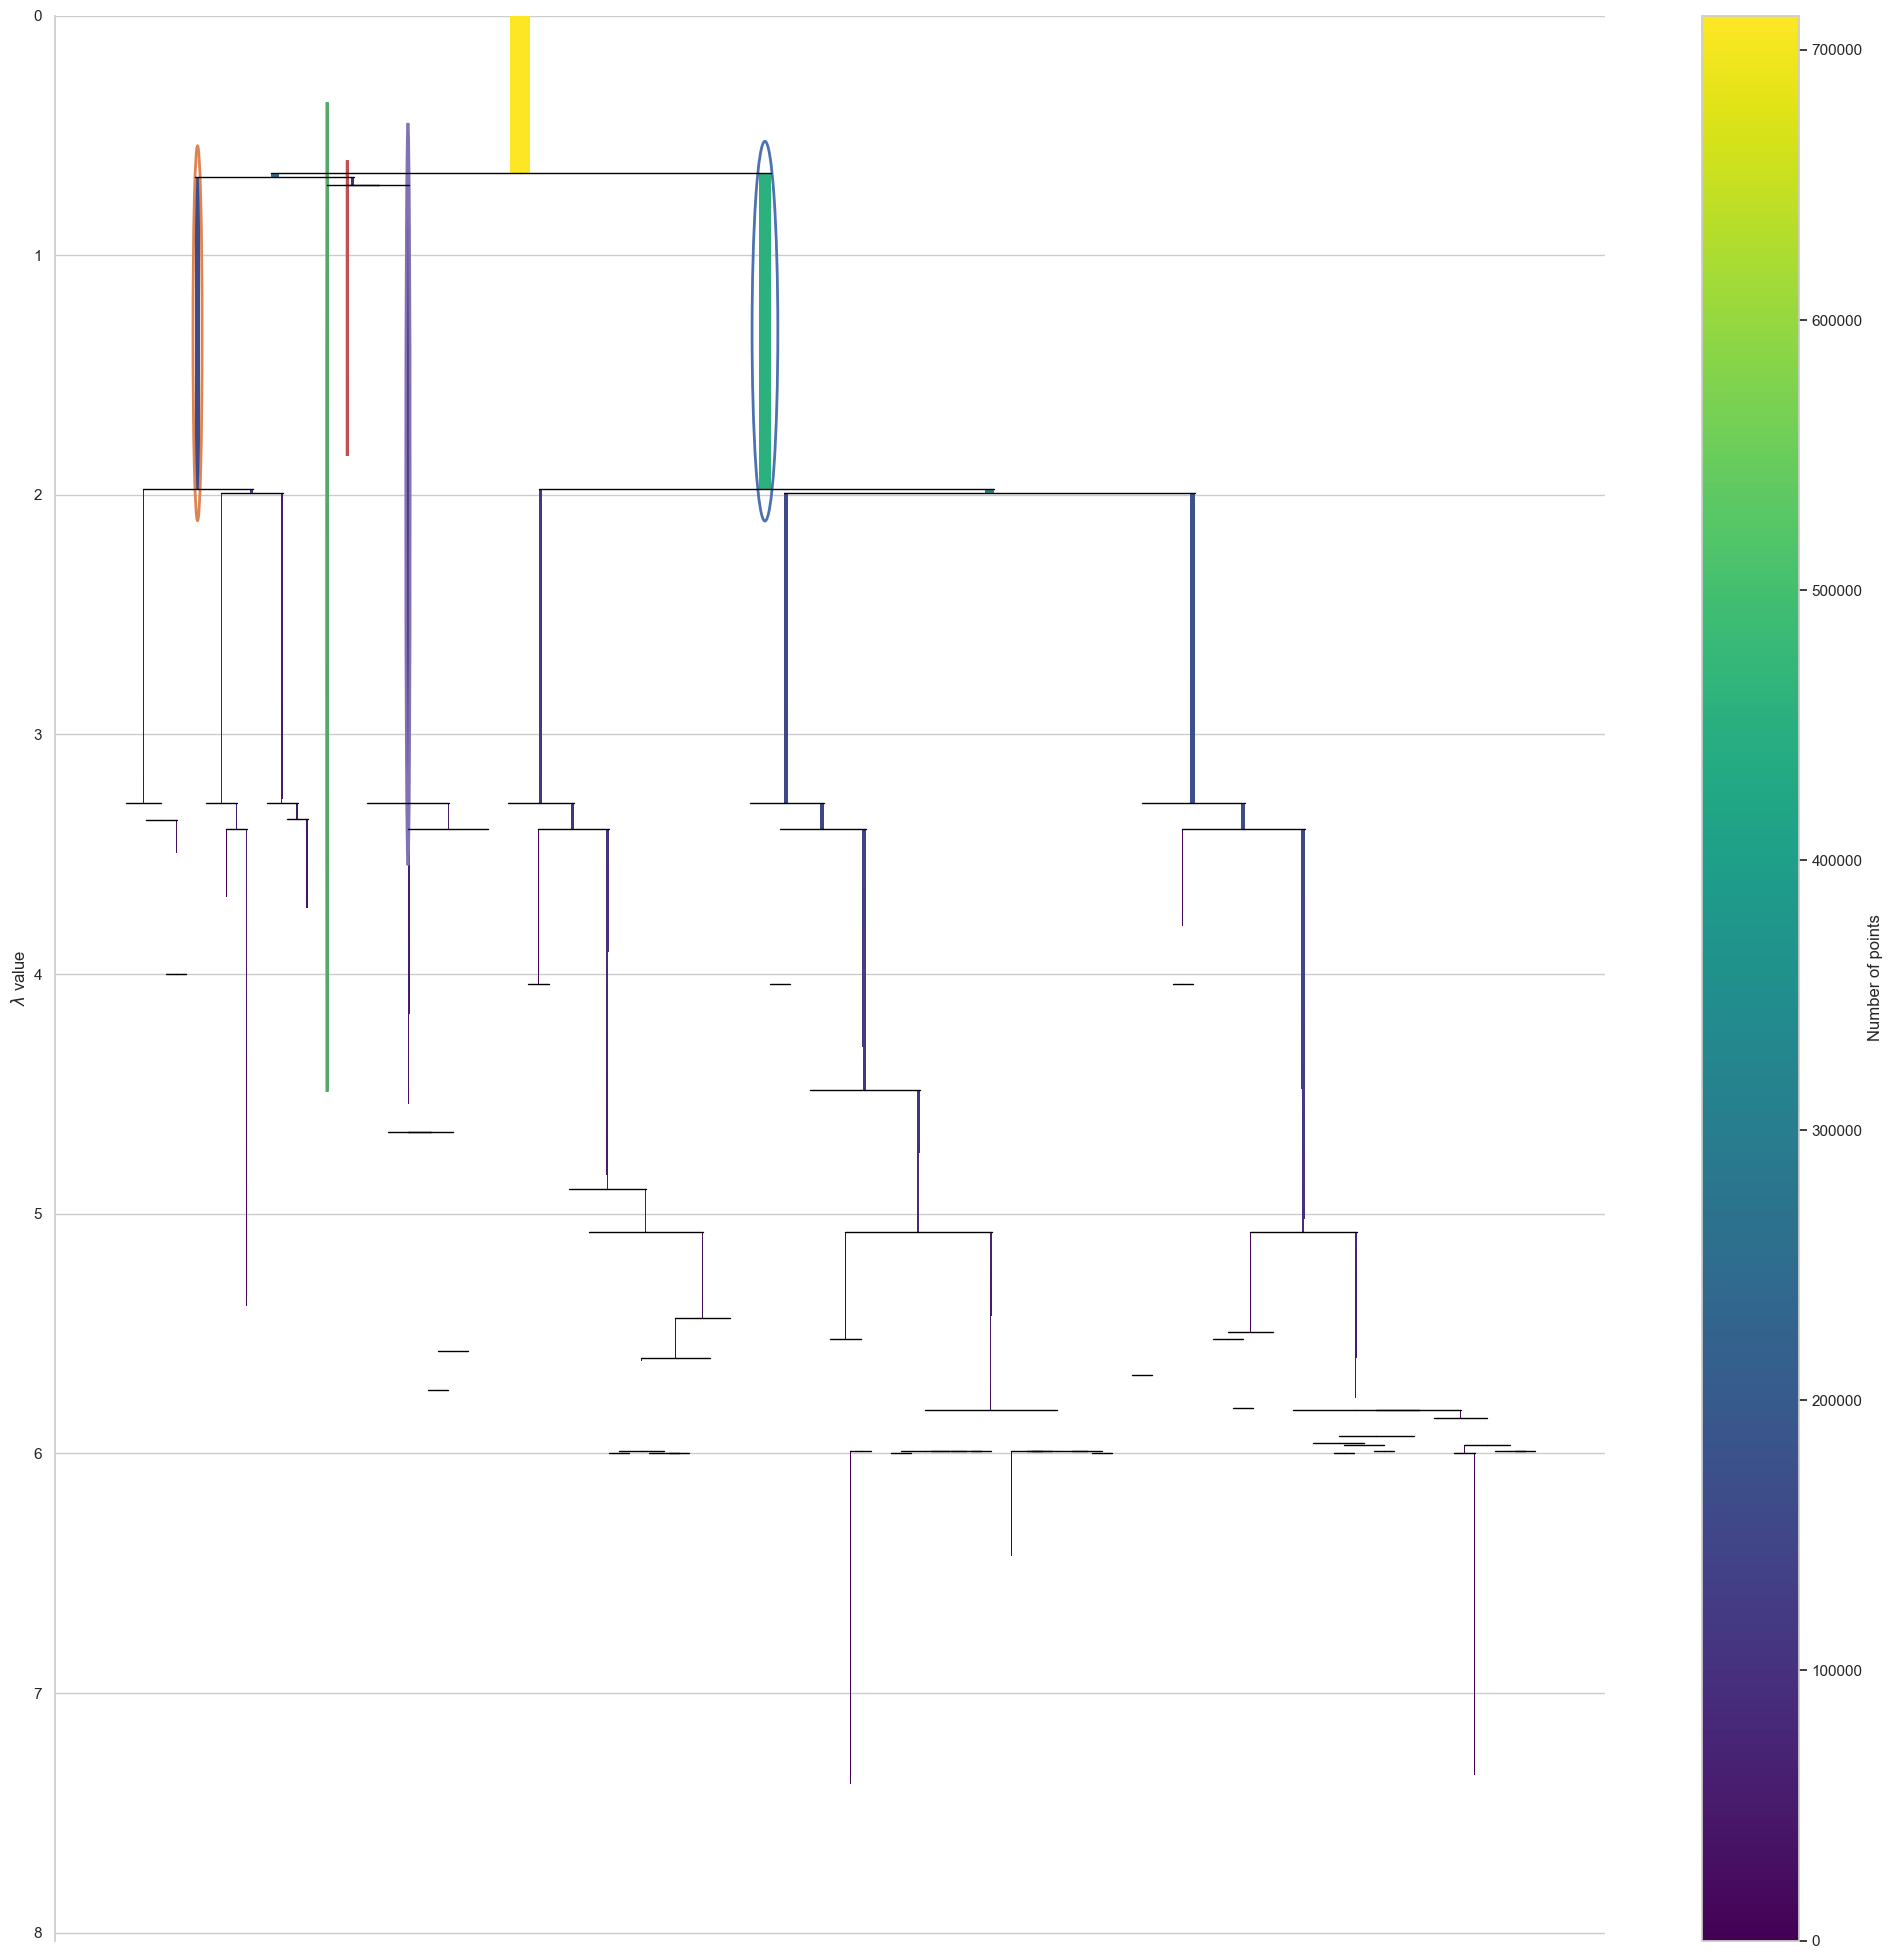

In [106]:
# Plotting the condensed tree
plt.figure(figsize=(25,25))

clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))
plt.show()

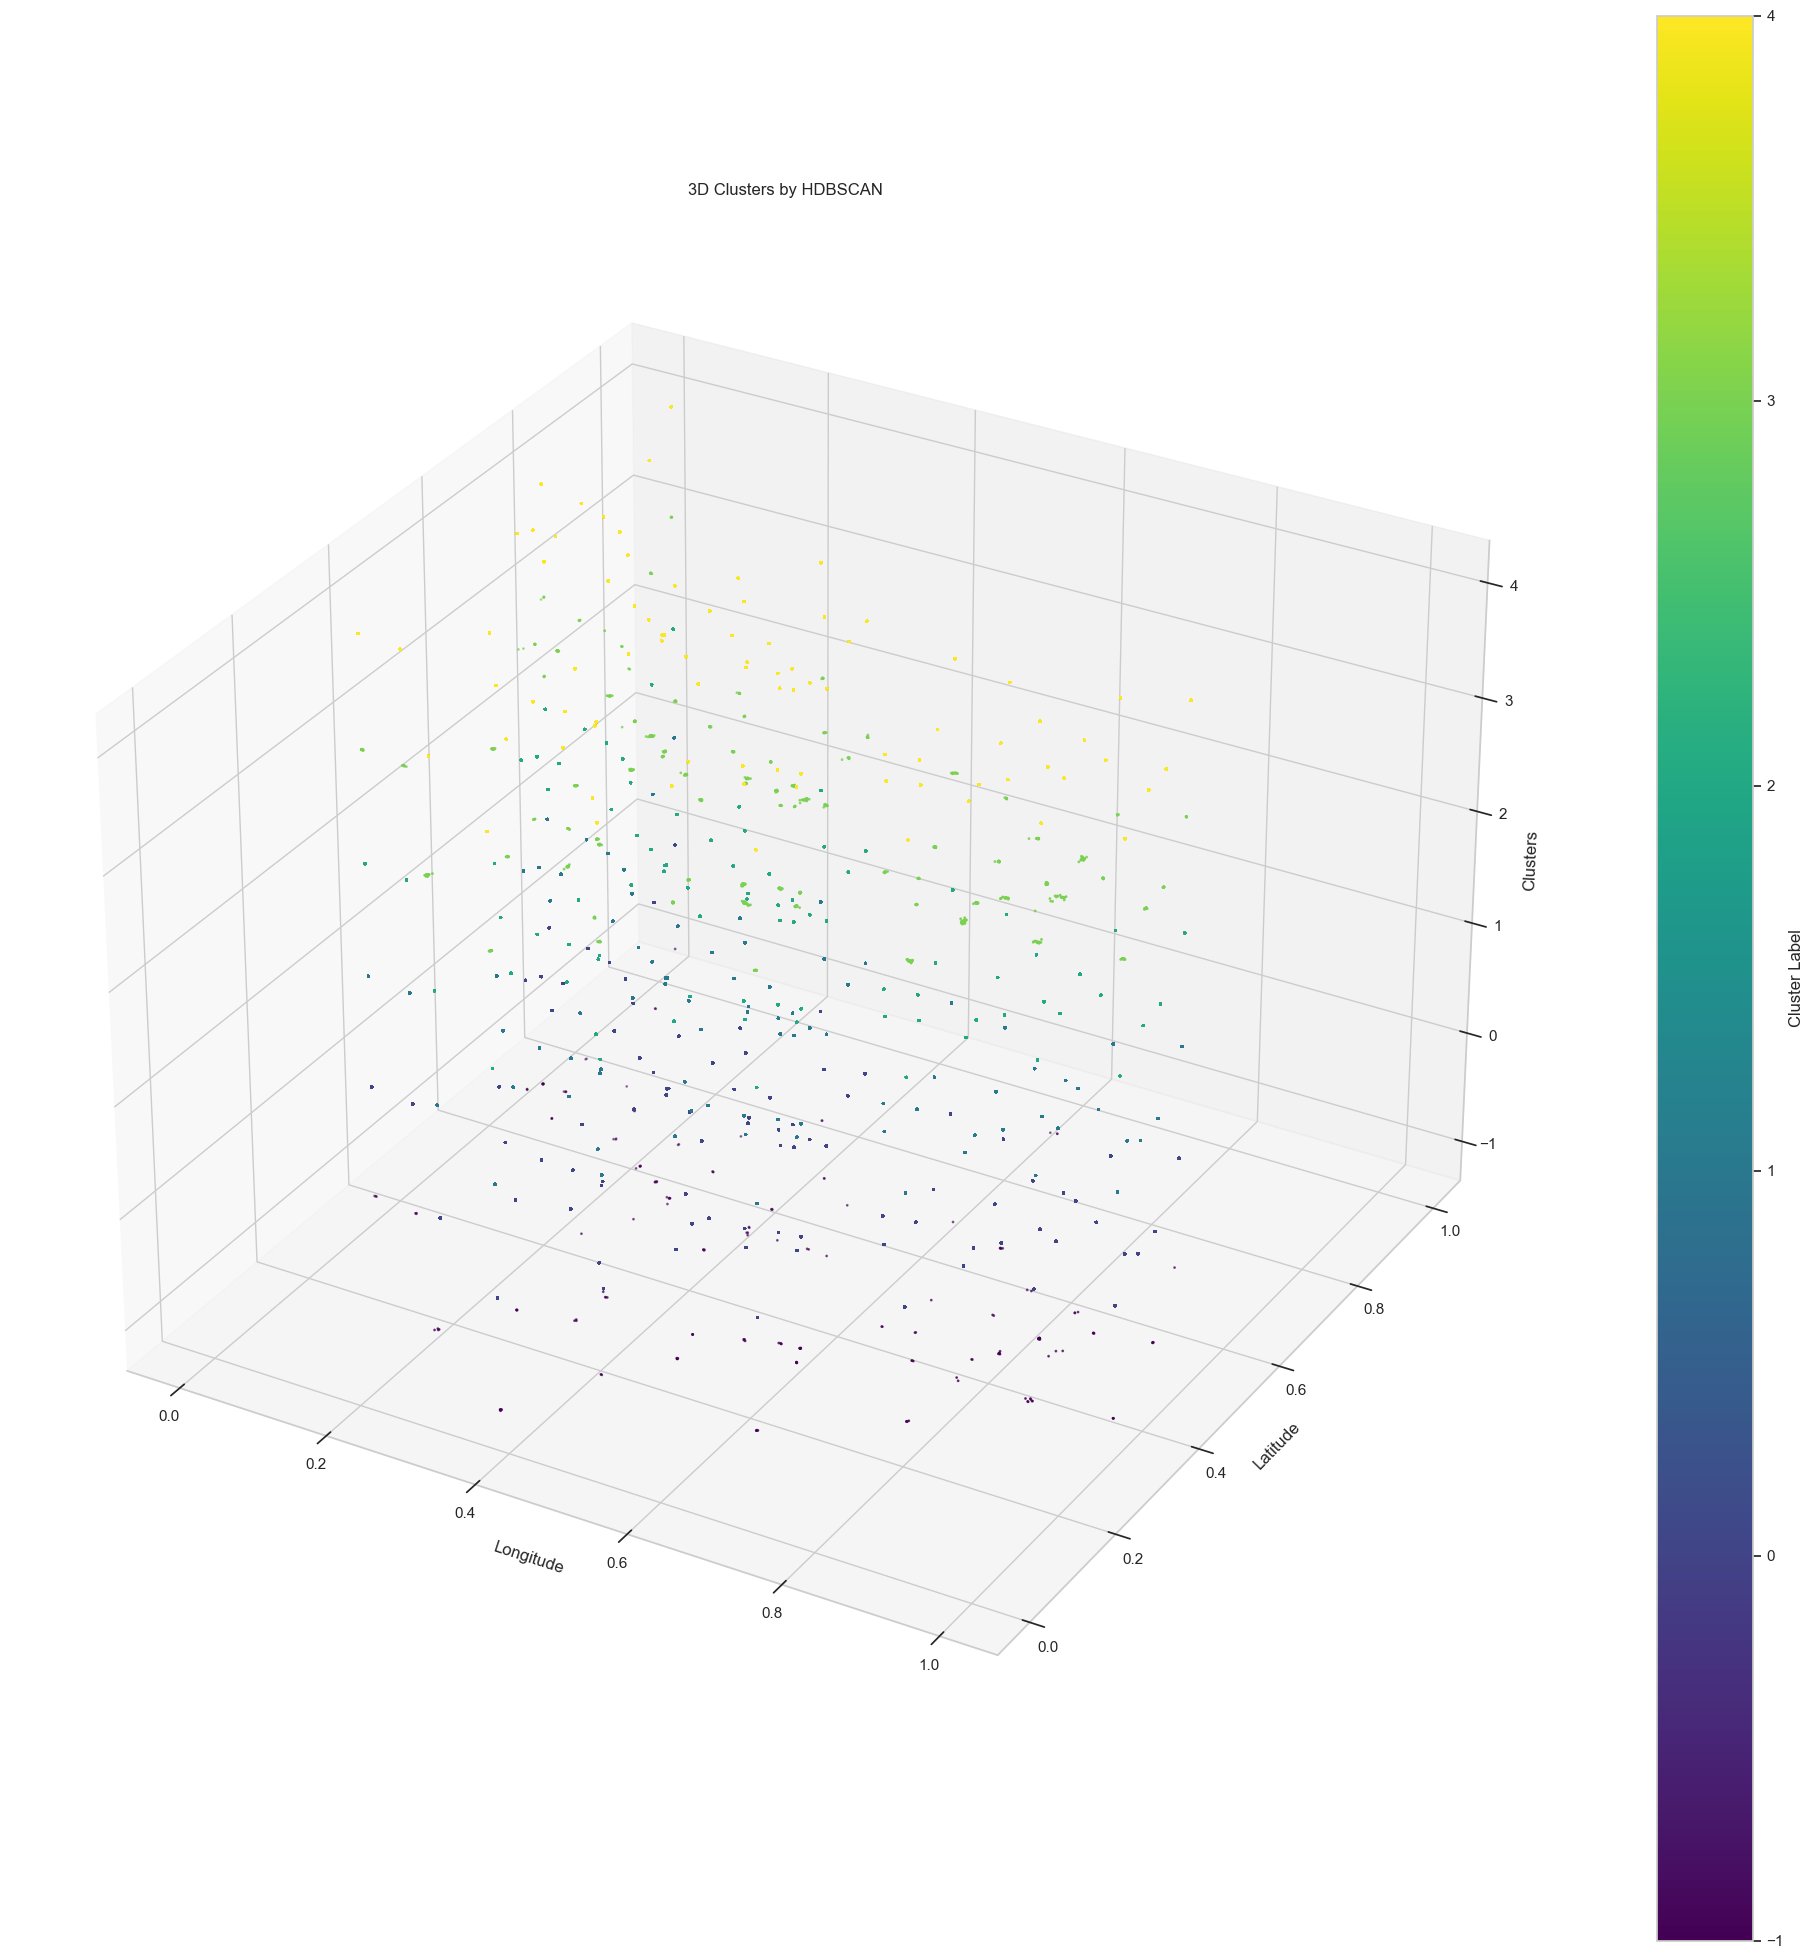

In [110]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3D visualization
sc = ax.scatter(
    clustering_df_encoded_with_Geo['start_lng'],
    clustering_df_encoded_with_Geo['start_lat'],
    clustering_df_encoded_with_Geo['clusters'],  # Replace with your third dimension
    c=clustering_df_encoded_with_Geo['clusters'],
    cmap='viridis',
    s=1
)

# Set labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Clusters')  # Replace with your third dimension label

# Title and colorbar
plt.title('3D Clusters by HDBSCAN')
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Cluster Label')

# Show plot
plt.show()


In [111]:
# Plot the minimum spanning tree
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/hdbscan/plots.py:818: UserWarning: Too many data points for safe rendering of an minimal spanning tree!
  warn('Too many data points for safe rendering of an minimal spanning tree!')


### **Hyperparameter Tuning: Running HDBSCAN with Geo Coordinates normalized with a diff `min_cluster_size`**

In [130]:
clusterd_df_encoded_Geo_Update_1 = clustering_df_encoded_with_Geo.drop('clusters', axis=1)

### Running  HDBSCAN with Geo Coordinates normalized and min cluster size = 250

In [132]:
# Initializing the model
clusterer = hdbscan.HDBSCAN(min_cluster_size=250, gen_min_span_tree=True)

# Fitting the model
clusterer.fit(clusterd_df_encoded_Geo_Update_1)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=250)

In [133]:
# Adding the cluster labels to the DataFrame
clusterd_df_encoded_Geo_Update_1['clusters'] = clusterer.labels_

clusterd_df_encoded_Geo_Update_1['clusters'].value_counts()



clusters
 1    456056
 0    162401
 4     75926
 2     16974
 3      1204
-1       210
Name: count, dtype: int64

In [134]:
clusterd_df_encoded_Geo_Update_1

,member_casual_casual,member_casual_member,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,start_lat,start_lng,duration_minutes,trip_distance,trip_frequency,AvgTemp,start_month,start_day,start_hour,season_ordinal,clusters
0,0,1,0,1,0,0.527306,0.387438,0.000231,0.136330,0.031596,0.745455,0.0,0.500000,0.739130,0.0,1
1,0,1,0,1,0,0.600061,0.268485,0.000257,0.096502,0.034700,0.418182,0.0,0.500000,0.739130,0.0,1
2,0,1,0,1,0,0.527306,0.387438,0.000129,0.023876,0.031596,0.745455,0.0,0.500000,0.869565,0.0,1
3,0,1,0,1,0,0.600061,0.268485,0.000329,0.201279,0.034700,0.372727,0.0,0.833333,0.782609,0.0,1
4,0,1,0,1,0,0.600061,0.268485,0.000137,0.055284,0.034700,0.409091,0.0,0.833333,0.521739,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712766,0,1,1,0,0,0.522449,0.788167,0.000164,0.086306,0.057977,0.127273,1.0,0.666667,0.304348,1.0,4
712767,0,1,1,0,0,0.310931,0.079208,0.000124,0.055552,0.246864,0.463636,1.0,1.000000,0.913043,1.0,4
712768,0,1,1,0,0,0.310931,0.079208,0.000163,0.055552,0.246864,0.463636,1.0,1.000000,0.478261,1.0,4
712769,0,1,1,0,0,0.310931,0.079208,0.000307,0.132803,0.246864,0.272727,1.0,0.833333,0.782609,1.0,4


### **IT IS WORTH EXPLORING THAT WHEN MIN CLUSTER SIZE = 500 VS 250 IT GIVES THE SAME RESULTS ??**